# Vessel Performance Model

### Phase 1: Data Exploration and Preprocessing

In [39]:
import pandas as pd
df = pd.read_json("vesselPerformance-Sample.json")
df.head()

AirPressure  AirTemperature  AnchorageName  \
0       1016.0            21.0            NaN   
1          NaN             NaN            NaN   
2          NaN             NaN            NaN   
3          NaN             NaN            NaN   
4          NaN             NaN            NaN   

                                    AuxiliaryBlowers  AverageSpeedGPS  \
0  [{'Ampere': None, 'IDCode': 'AuxiliaryBlower3'...            11.92   
1                                                NaN              NaN   
2                                                 []              NaN   
3                                                 []              NaN   
4                                                 []              NaN   

   AverageSpeedLog  BallastWater  BoilerExhaustTemperatureAfter  \
0            12.46       25650.0                            NaN   
1              NaN       25650.0                            NaN   
2              NaN       25650.0                            NaN   
3              NaN       25650.0                            NaN   
4              NaN       25650.0                            NaN   

   BoilerIsExhaustBypassActive  CargoMetricTons  ...  DraftNextPort  \
0                          0.0              0.0  ...            NaN   
1                          NaN              NaN  ...            NaN   
2                          0.0              0.0  ...            NaN   
3                          0.0              0.0  ...            NaN   
4                          0.0              0.0  ...            NaN   

  EstimatedBunkersNextPort EstimatedTimeOfArrival  IsMainEngineRunning  \
0                      NaN                    NaN                  NaN   
1                      NaN                    NaN                  NaN   
2                      NaN                    NaN                  NaN   
3                      NaN                    NaN                  NaN   
4                      NaN                    NaN                  NaN   

   MetacentricHeight  ShearForcesInPercent  StandByEngineTime  \
0                NaN                   NaN                NaN   
1                NaN                   NaN                NaN   
2                NaN                   NaN                NaN   
3                NaN                   NaN                NaN   
4                NaN                   NaN                NaN   

   TorsionMomentsInPercent  DistanceToEosp  SailedDistance  
0                      NaN             NaN             NaN  
1                      NaN             NaN             NaN  
2                      NaN             NaN             NaN  
3                      NaN             NaN             NaN  
4                      NaN             NaN             NaN  

[5 rows x 136 columns]

In [40]:
df=pd.DataFrame(df)
df.head()

AirPressure  AirTemperature  AnchorageName  \
0       1016.0            21.0            NaN   
1          NaN             NaN            NaN   
2          NaN             NaN            NaN   
3          NaN             NaN            NaN   
4          NaN             NaN            NaN   

                                    AuxiliaryBlowers  AverageSpeedGPS  \
0  [{'Ampere': None, 'IDCode': 'AuxiliaryBlower3'...            11.92   
1                                                NaN              NaN   
2                                                 []              NaN   
3                                                 []              NaN   
4                                                 []              NaN   

   AverageSpeedLog  BallastWater  BoilerExhaustTemperatureAfter  \
0            12.46       25650.0                            NaN   
1              NaN       25650.0                            NaN   
2              NaN       25650.0                            NaN   
3              NaN       25650.0                            NaN   
4              NaN       25650.0                            NaN   

   BoilerIsExhaustBypassActive  CargoMetricTons  ...  DraftNextPort  \
0                          0.0              0.0  ...            NaN   
1                          NaN              NaN  ...            NaN   
2                          0.0              0.0  ...            NaN   
3                          0.0              0.0  ...            NaN   
4                          0.0              0.0  ...            NaN   

  EstimatedBunkersNextPort EstimatedTimeOfArrival  IsMainEngineRunning  \
0                      NaN                    NaN                  NaN   
1                      NaN                    NaN                  NaN   
2                      NaN                    NaN                  NaN   
3                      NaN                    NaN                  NaN   
4                      NaN                    NaN                  NaN   

   MetacentricHeight  ShearForcesInPercent  StandByEngineTime  \
0                NaN                   NaN                NaN   
1                NaN                   NaN                NaN   
2                NaN                   NaN                NaN   
3                NaN                   NaN                NaN   
4                NaN                   NaN                NaN   

   TorsionMomentsInPercent  DistanceToEosp  SailedDistance  
0                      NaN             NaN             NaN  
1                      NaN             NaN             NaN  
2                      NaN             NaN             NaN  
3                      NaN             NaN             NaN  
4                      NaN             NaN             NaN  

[5 rows x 136 columns]

In [41]:
x = list(df.columns)
x

['AirPressure',
 'AirTemperature',
 'AnchorageName',
 'AuxiliaryBlowers',
 'AverageSpeedGPS',
 'AverageSpeedLog',
 'BallastWater',
 'BoilerExhaustTemperatureAfter',
 'BoilerIsExhaustBypassActive',
 'CargoMetricTons',
 'ChartererSpeedOrder',
 'ChiefEngineerName',
 'Consumptions',
 'Containers',
 'Course',
 'CurrentDirection',
 'CurrentStrength',
 'DistanceFromLastPort',
 'DistanceToNextPort',
 'DistanceTravelledSinceLastReport',
 'DraftAFT',
 'DraftFWD',
 'DraftMid',
 'Engine',
 'EngineDriftingStoppageTime',
 'EngineRoomAirPressure',
 'EngineRoomAirTemperature',
 'EngineRoomRelativeAirHumidity',
 'EngineSlip',
 'EstimatedTimeOfCargoCompletion',
 'EstimatedTimeOfDepartureCurrentPort',
 'FuelRackPosition',
 'FuelRobs',
 'Generators',
 'ID',
 'IsCombinatorMode',
 'IsFuelChangeover',
 'IsPositionWarningOverridden',
 'IsShaftGeneratorRunning',
 'IsSlowSteaming',
 'IsTurboChargerCutOut',
 'Latitude',
 'Load',
 'Longitude',
 'MainEngineCylinderOil',
 'MainEngineSecondCylinderOil',
 'MasterName

#### Handling nested fields 

In [42]:
listdict_col_names = ['AuxiliaryBlowers' ,  'OtherRobs' , 'MainEngines' , 'Consumptions' , 'FuelRobs' , 'Generators']
commasep_list = ['ChiefEngineerName' ,  'MasterName']
hyphensep_list = ['FromPortCode' ,  'ToPortCode' ]
dict_col_names = ['Load' , 'Longitude' , 'MainEngineCylinderOil' , 'MainEngineSecondCylinderOil' , 'Draft' , 'DraftNextPort' , 'Engine' , 'Latitude']

In [43]:
listdict_col_names = ['AuxiliaryBlowers' ,  'OtherRobs' , 'MainEngines' , 'Consumptions' , 'FuelRobs' , 'Generators']


def listdict_to_col(x):
    global df
    for list1 in list(x):
        if isinstance(list1, list) and list1:
            for dic in list1:
                if isinstance(dic, dict):
                    for key, value in dic.items():
                        if pd.notna(value):
                             df.loc[:, key] = value

    return df




for feature in listdict_col_names :
   df = listdict_to_col(df[feature])
   df = df.drop(feature, axis=1)



In [44]:
def dict_to_col(x , col_name):
      for dic in list(x):
            if isinstance(dic, dict):
                for key, value in dic.items():
                      if pd.notna(value):
                          df[key] = value


      return df

for feature in dict_col_names :
    df = dict_to_col(df[feature] , feature)
    df = df.drop(feature, axis=1)

In [45]:
def comma_sep(x , col_name):
    for i in list(x):

        if pd.notna(i) and isinstance(i, str):
            li = i.split(",")

            if len(li) >= 2:
                df[col_name + '-1'] = li[0]
                df[col_name + '-2'] = li[1]
            else:

                df[col_name +'-1'] = li[0]
                df[col_name +'-2'] = None
        else:

            df[col_name +'-1'] = None
            df[col_name +'-2'] = None


    return df

for feature in commasep_list :
    df = comma_sep(df[feature] , feature)
    df = df.drop(feature, axis=1)

In [46]:

def hyphen_sep(x , col_name):
    new_temp_values = []
    for i in list(x):
        if isinstance(i, str) and i:
            li = i.split("-")
            if len(li) >= 2:
                new_temp_values.append(li[1])
            else:
                new_temp_values.append(li[0])
        else:
            new_temp_values.append(None)

    df['new_' + col_name] = new_temp_values

    return df

for feature in hyphensep_list :
   df =  hyphen_sep(df[feature] , feature)
   df = df.drop(feature, axis=1)

In [47]:
df

AirPressure  AirTemperature  AnchorageName  AverageSpeedGPS  \
0         1016.0            21.0            NaN            11.92   
1            NaN             NaN            NaN              NaN   
2            NaN             NaN            NaN              NaN   
3            NaN             NaN            NaN              NaN   
4            NaN             NaN            NaN              NaN   
..           ...             ...            ...              ...   
680        996.0             2.0            NaN             9.62   
681        983.0             8.0            NaN            11.17   
682        999.0            10.0            NaN            11.67   
683        999.0            10.0            NaN            12.26   
684       1015.0             7.0            NaN            11.79   

     AverageSpeedLog  BallastWater  BoilerExhaustTemperatureAfter  \
0              12.46       24766.0                            NaN   
1                NaN       24766.0                            NaN   
2                NaN       24766.0                            NaN   
3                NaN       24766.0                            NaN   
4                NaN       24766.0                            NaN   
..               ...           ...                            ...   
680             9.62       24766.0                            NaN   
681            11.17       24766.0                            NaN   
682            11.67       24766.0                            NaN   
683            12.26       24766.0                            NaN   
684            11.79       24766.0                            NaN   

     BoilerIsExhaustBypassActive  CargoMetricTons  ChartererSpeedOrder  ...  \
0                            0.0              0.0                 12.0  ...   
1                            NaN              NaN                  NaN  ...   
2                            0.0              0.0                 12.0  ...   
3                            0.0              0.0                 12.0  ...   
4                            0.0              0.0                 12.0  ...   
..                           ...              ...                  ...  ...   
680                          0.0              NaN                 13.0  ...   
681                          0.0              NaN                 13.0  ...   
682                          0.0              NaN                 13.0  ...   
683                          0.0              NaN                 13.0  ...   
684                          0.0              NaN                 13.0  ...   

     PowerAtShaftRelative  RunningHours  SpeedThroughWater  SpeedOverGround  \
0                   76.98          24.0                0.0              0.0   
1                   76.98          24.0                0.0              0.0   
2                   76.98          24.0                0.0              0.0   
3                   76.98          24.0                0.0              0.0   
4                   76.98          24.0                0.0              0.0   
..                    ...           ...                ...              ...   
680                 76.98          24.0                0.0              0.0   
681                 76.98          24.0                0.0              0.0   
682                 76.98          24.0                0.0              0.0   
683                 76.98          24.0                0.0              0.0   
684                 76.98          24.0                0.0              0.0   

     ChiefEngineerName-1  ChiefEngineerName-2  MasterName-1  MasterName-2  \
0                  LOJKO                Marek       ARBULIC       Cvijeto   
1                  LOJKO                Marek       ARBULIC       Cvijeto   
2                  LOJKO                Marek       ARBULIC       Cvijeto   
3                  LOJKO                Marek       ARBULIC       Cvijeto   
4                  LOJKO                Marek       ARBULIC       Cvijeto   

In [48]:
def PerformanceCodes(x):
    global df
    for i in list(x):

        if isinstance(i, list) and any(pd.notna(element) for element in i):
            df['Weather'] = i[0]

            break
    return df

df = PerformanceCodes(df['PerformanceCodes'])

In [49]:
df

AirPressure  AirTemperature  AnchorageName  AverageSpeedGPS  \
0         1016.0            21.0            NaN            11.92   
1            NaN             NaN            NaN              NaN   
2            NaN             NaN            NaN              NaN   
3            NaN             NaN            NaN              NaN   
4            NaN             NaN            NaN              NaN   
..           ...             ...            ...              ...   
680        996.0             2.0            NaN             9.62   
681        983.0             8.0            NaN            11.17   
682        999.0            10.0            NaN            11.67   
683        999.0            10.0            NaN            12.26   
684       1015.0             7.0            NaN            11.79   

     AverageSpeedLog  BallastWater  BoilerExhaustTemperatureAfter  \
0              12.46       24766.0                            NaN   
1                NaN       24766.0                            NaN   
2                NaN       24766.0                            NaN   
3                NaN       24766.0                            NaN   
4                NaN       24766.0                            NaN   
..               ...           ...                            ...   
680             9.62       24766.0                            NaN   
681            11.17       24766.0                            NaN   
682            11.67       24766.0                            NaN   
683            12.26       24766.0                            NaN   
684            11.79       24766.0                            NaN   

     BoilerIsExhaustBypassActive  CargoMetricTons  ChartererSpeedOrder  ...  \
0                            0.0              0.0                 12.0  ...   
1                            NaN              NaN                  NaN  ...   
2                            0.0              0.0                 12.0  ...   
3                            0.0              0.0                 12.0  ...   
4                            0.0              0.0                 12.0  ...   
..                           ...              ...                  ...  ...   
680                          0.0              NaN                 13.0  ...   
681                          0.0              NaN                 13.0  ...   
682                          0.0              NaN                 13.0  ...   
683                          0.0              NaN                 13.0  ...   
684                          0.0              NaN                 13.0  ...   

     RunningHours  SpeedThroughWater  SpeedOverGround  ChiefEngineerName-1  \
0            24.0                0.0              0.0                LOJKO   
1            24.0                0.0              0.0                LOJKO   
2            24.0                0.0              0.0                LOJKO   
3            24.0                0.0              0.0                LOJKO   
4            24.0                0.0              0.0                LOJKO   
..            ...                ...              ...                  ...   
680          24.0                0.0              0.0                LOJKO   
681          24.0                0.0              0.0                LOJKO   
682          24.0                0.0              0.0                LOJKO   
683          24.0                0.0              0.0                LOJKO   
684          24.0                0.0              0.0                LOJKO   

     ChiefEngineerName-2  MasterName-1  MasterName-2  new_FromPortCode  \
0                  Marek       ARBULIC       Cvijeto             SGSIN   
1                  Marek       ARBULIC       Cvijeto             SGSIN   
2                  Marek       ARBULIC       Cvijeto             AUPHE   
3                  Marek       ARBULIC       Cvijeto             AUPHE   
4                  Marek       ARBULIC       Cvijeto             AUPHE   
..                   ...     

In [50]:

def convert_time_zone_to_ist(y, col_name):
    def convert_to_ist(time_zone):
        if pd.notna(time_zone) and isinstance(time_zone, str):
            hours_offset = 0
            minutes_offset = 0
            if '+' in time_zone:
                sign = 1
                parts = time_zone.split('+')[1].split(':')
            elif '-' in time_zone:
                sign = -1
                parts = time_zone.split('-')[1].split(':')
            if len(parts) == 2:
                hours_offset = sign * int(parts[0])
                minutes_offset = sign * int(parts[1])
            total_minutes_offset = hours_offset * 60 + minutes_offset
            total_minutes_offset += 330  
            new_hours = total_minutes_offset // 60
            new_minutes = total_minutes_offset % 60
            return f"{new_hours:02d}:{new_minutes:02d}"
        return None

   
    df['new_TimeZoneInfo'] = df[col_name].apply(convert_to_ist)
    
     
    df['new_TimeZoneInfo'] = df['new_TimeZoneInfo'].str.replace('-', '')
 
    df.drop(columns=[col_name], inplace=True)
    
    return df


df = convert_time_zone_to_ist(df["TimeZoneInfo"], 'TimeZoneInfo')


In [51]:
df

AirPressure  AirTemperature  AnchorageName  AverageSpeedGPS  \
0         1016.0            21.0            NaN            11.92   
1            NaN             NaN            NaN              NaN   
2            NaN             NaN            NaN              NaN   
3            NaN             NaN            NaN              NaN   
4            NaN             NaN            NaN              NaN   
..           ...             ...            ...              ...   
680        996.0             2.0            NaN             9.62   
681        983.0             8.0            NaN            11.17   
682        999.0            10.0            NaN            11.67   
683        999.0            10.0            NaN            12.26   
684       1015.0             7.0            NaN            11.79   

     AverageSpeedLog  BallastWater  BoilerExhaustTemperatureAfter  \
0              12.46       24766.0                            NaN   
1                NaN       24766.0                            NaN   
2                NaN       24766.0                            NaN   
3                NaN       24766.0                            NaN   
4                NaN       24766.0                            NaN   
..               ...           ...                            ...   
680             9.62       24766.0                            NaN   
681            11.17       24766.0                            NaN   
682            11.67       24766.0                            NaN   
683            12.26       24766.0                            NaN   
684            11.79       24766.0                            NaN   

     BoilerIsExhaustBypassActive  CargoMetricTons  ChartererSpeedOrder  ...  \
0                            0.0              0.0                 12.0  ...   
1                            NaN              NaN                  NaN  ...   
2                            0.0              0.0                 12.0  ...   
3                            0.0              0.0                 12.0  ...   
4                            0.0              0.0                 12.0  ...   
..                           ...              ...                  ...  ...   
680                          0.0              NaN                 13.0  ...   
681                          0.0              NaN                 13.0  ...   
682                          0.0              NaN                 13.0  ...   
683                          0.0              NaN                 13.0  ...   
684                          0.0              NaN                 13.0  ...   

     SpeedThroughWater  SpeedOverGround  ChiefEngineerName-1  \
0                  0.0              0.0                LOJKO   
1                  0.0              0.0                LOJKO   
2                  0.0              0.0                LOJKO   
3                  0.0              0.0                LOJKO   
4                  0.0              0.0                LOJKO   
..                 ...              ...                  ...   
680                0.0              0.0                LOJKO   
681                0.0              0.0                LOJKO   
682                0.0              0.0                LOJKO   
683                0.0              0.0                LOJKO   
684                0.0              0.0                LOJKO   

     ChiefEngineerName-2  MasterName-1  MasterName-2  new_FromPortCode  \
0                  Marek       ARBULIC       Cvijeto             SGSIN   
1                  Marek       ARBULIC       Cvijeto             SGSIN   
2                  Marek       ARBULIC       Cvijeto             AUPHE   
3                  Marek       ARBULIC       Cvijeto             AUPHE   
4                  Marek       ARBULIC       Cvijeto             AUPHE   
..                   ...           ...           ...               ...   
680                Marek       ARBULIC       Cvijeto             JPWAK   
681                Marek       ARBULIC       Cvij

##### Identifying columns that contains all missing or null values("Unknown",NaN,0) and dropping them 

In [54]:
columns_with_all_unknown = df.columns[(df == "Unknown").all()]

columns_with_all_nan = df.columns[df.isnull().all()]

columns_with_all_zeros = df.columns[(df == 0).all()]

columns_to_drop = columns_with_all_unknown.union(columns_with_all_nan).union(columns_with_all_zeros)


df.drop(columns=columns_to_drop, inplace=True)




In [55]:
df

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0         1016.0            21.0            11.92            12.46   
1            NaN             NaN              NaN              NaN   
2            NaN             NaN              NaN              NaN   
3            NaN             NaN              NaN              NaN   
4            NaN             NaN              NaN              NaN   
..           ...             ...              ...              ...   
680        996.0             2.0             9.62             9.62   
681        983.0             8.0            11.17            11.17   
682        999.0            10.0            11.67            11.67   
683        999.0            10.0            12.26            12.26   
684       1015.0             7.0            11.79            11.79   

     BallastWater  BoilerExhaustTemperatureAfter  BoilerIsExhaustBypassActive  \
0         24766.0                            NaN                          0.0   
1         24766.0                            NaN                          NaN   
2         24766.0                            NaN                          0.0   
3         24766.0                            NaN                          0.0   
4         24766.0                            NaN                          0.0   
..            ...                            ...                          ...   
680       24766.0                            NaN                          0.0   
681       24766.0                            NaN                          0.0   
682       24766.0                            NaN                          0.0   
683       24766.0                            NaN                          0.0   
684       24766.0                            NaN                          0.0   

     CargoMetricTons  ChartererSpeedOrder  Containers  ...  \
0                0.0                 12.0         0.0  ...   
1                NaN                  NaN         NaN  ...   
2                0.0                 12.0         0.0  ...   
3                0.0                 12.0         0.0  ...   
4                0.0                 12.0         0.0  ...   
..               ...                  ...         ...  ...   
680              NaN                 13.0         0.0  ...   
681              NaN                 13.0         0.0  ...   
682              NaN                 13.0         0.0  ...   
683              NaN                 13.0         0.0  ...   
684              NaN                 13.0         0.0  ...   

     PowerAtShaftRelative  RunningHours  ChiefEngineerName-1  \
0                   76.98          24.0                LOJKO   
1                   76.98          24.0                LOJKO   
2                   76.98          24.0                LOJKO   
3                   76.98          24.0                LOJKO   
4                   76.98          24.0                LOJKO   
..                    ...           ...                  ...   
680                 76.98          24.0                LOJKO   
681                 76.98          24.0                LOJKO   
682                 76.98          24.0                LOJKO   
683                 76.98          24.0                LOJKO   
684                 76.98          24.0                LOJKO   

     ChiefEngineerName-2  MasterName-1  MasterName-2  new_FromPortCode  \
0                  Marek       ARBULIC       Cvijeto             SGSIN   
1                  Marek       ARBULIC       Cvijeto             SGSIN   
2                  Marek       ARBULIC       Cvijeto             AUPHE   
3                  Marek       ARBULIC       Cvijeto             AUPHE   
4                  Marek       ARBULIC       Cvijeto             AUPHE   
..                   ...           ...           ...               ...   
680                Marek       ARBULIC       Cvijeto             JPWAK   
681                Marek       ARBULIC       Cvijeto             JPWAK   
682        

##### Dropping irrelevant Features

In [56]:
columns_to_drop = ['BoilerExhaustTemperatureAfter','BoilerIsExhaustBypassActive','Containers','FuelRackPosition','IsShaftGeneratorRunning','Course','DraftAFT','DraftFWD','DraftMid','ID','IsPositionWarningOverridden',
'SailedDistanceGPS','SeaStateInMetres','TurboChargerRPMAft','ValidationDate','VersionStamp','TurboChargerRPMFore','VITSetting','WindStrength','FirstPilotOnBoardTime','NoCargoOperation','Amount',
'ConsumptionTypeIDCode','AveragePowerAtShaft','FromPortID','ReportingPeriod','ToPortID','Amount','Viscosity','FuelOilTypeIDCode','AuxiliaryGeneratorID','AverageEnergyProducedPerHourRelative','Displacement',
'RPM','PowerAtShaft','PowerAtShaftRelative','RunHours','EnergyProducedInReportingPeriod','LubeOilConsumption','Minutes','Degrees','Guid','LastPilotAwayTime','LocalTime','WaterDepth',
'TurboChargerRPMMid','SailedDistanceLog','IsSlowSteaming','PerformanceCodes','Reefers','Boilers','Remark','ShaftGenerators','VesselID','SpecialVoyages','CurrentDirection','AverageShaftRevolutionsPerMinute',
'ChartererSpeedOrder','CIIConsumptions','DraftAft','DraftFwd','WaterDensity','DistanceSteamed','IsMainEngineRunning','TorsionMomentsInPercent','IDCode','RobTypeIDCode','BallastWater',
'AverageEnergyProducedPerHour','FuelTypeIDCode','EngineID','EventReportGuid','Slip' ,'LowerCalorificValue','EngineMaker','EngineModel','AccFactor','Bdn', 'Trim','ChiefEngineerName-1',
'ChiefEngineerName-2','SpecificConsumption','MasterName-1','MasterName-2','GeneratorType','Position','Sulphur','Temperature']

df.drop(columns=columns_to_drop, inplace=True)
df


AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0         1016.0            21.0            11.92            12.46   
1            NaN             NaN              NaN              NaN   
2            NaN             NaN              NaN              NaN   
3            NaN             NaN              NaN              NaN   
4            NaN             NaN              NaN              NaN   
..           ...             ...              ...              ...   
680        996.0             2.0             9.62             9.62   
681        983.0             8.0            11.17            11.17   
682        999.0            10.0            11.67            11.67   
683        999.0            10.0            12.26            12.26   
684       1015.0             7.0            11.79            11.79   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0                0.0              1.3                1660.0   
1                NaN              NaN                   NaN   
2                0.0              NaN                   NaN   
3                0.0              NaN                   NaN   
4                0.0              NaN                   NaN   
..               ...              ...                   ...   
680              NaN              0.5                3087.0   
681              NaN              1.0                3344.0   
682              NaN              1.0                3624.0   
683              NaN              0.8                3906.0   
684              NaN              1.0                4189.0   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0                  27.0                             286.0   
1                   NaN                               NaN   
2                   NaN                               NaN   
3                   NaN                               NaN   
4                   NaN                               NaN   
..                  ...                               ...   
680              1567.0                             231.0   
681              1310.0                             257.0   
682              1030.0                             280.0   
683               748.0                             282.0   
684               465.0                             283.0   

     EngineDriftingStoppageTime  ...  SailedDistance  \
0                      0.000000  ...             NaN   
1                           NaN  ...             NaN   
2                     22.083333  ...             NaN   
3                     24.000000  ...             NaN   
4                     24.000000  ...             NaN   
..                          ...  ...             ...   
680                    0.000000  ...             NaN   
681                    0.000000  ...             NaN   
682                    0.000000  ...             NaN   
683                    0.000000  ...             NaN   
684                    0.000000  ...             NaN   

     RunningHoursCounterValue  EnergyProducedCounterValue  \
0                     29601.0                  52104000.0   
1                     29601.0                  52104000.0   
2                     29601.0                  52104000.0   
3                     29601.0                  52104000.0   
4                     29601.0                  52104000.0   
..                        ...                         ...   
680                   29601.0                  52104000.0   
681                   29601.0                  52104000.0   
682                   29601.0                  52104000.0   
683                   29601.0                  52104000.0   
684                   29601.0                  52104000.0   

     EnergyProducedInReportPeriod  Consumption  RunningHours  \
0                        121300.0         70.0          24.0   
1                        121300.0         70.0          24.0   
2                        121300.0         70.0          24.0   
3           

In [58]:
def replace_null_with_mean(df, columns):
    for column in columns:
        if df[column].dtype != 'object': 
            df[column].fillna(df[column].mean(), inplace=True)
    return df

columns_to_replace = ["SailedDistance",'DistanceTravelledSinceLastReport','TotalCylinderOilConsumption','TotalCylinderOilSpecificConsumption','AirPressure','AirTemperature','CargoMetricTons']

df = replace_null_with_mean(df, columns_to_replace)
df

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0    1016.000000            21.0            11.92            12.46   
1    1010.523944            22.4              NaN              NaN   
2    1010.523944            22.4              NaN              NaN   
3    1010.523944            22.4              NaN              NaN   
4    1010.523944            22.4              NaN              NaN   
..           ...             ...              ...              ...   
680   996.000000             2.0             9.62             9.62   
681   983.000000             8.0            11.17            11.17   
682   999.000000            10.0            11.67            11.67   
683   999.000000            10.0            12.26            12.26   
684  1015.000000             7.0            11.79            11.79   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0            0.00000              1.3                1660.0   
1        46428.79321              NaN                   NaN   
2            0.00000              NaN                   NaN   
3            0.00000              NaN                   NaN   
4            0.00000              NaN                   NaN   
..               ...              ...                   ...   
680      46428.79321              0.5                3087.0   
681      46428.79321              1.0                3344.0   
682      46428.79321              1.0                3624.0   
683      46428.79321              0.8                3906.0   
684      46428.79321              1.0                4189.0   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0                  27.0                        286.000000   
1                   NaN                        219.731646   
2                   NaN                        219.731646   
3                   NaN                        219.731646   
4                   NaN                        219.731646   
..                  ...                               ...   
680              1567.0                        231.000000   
681              1310.0                        257.000000   
682              1030.0                        280.000000   
683               748.0                        282.000000   
684               465.0                        283.000000   

     EngineDriftingStoppageTime  ...  SailedDistance  \
0                      0.000000  ...       23.805556   
1                           NaN  ...       23.805556   
2                     22.083333  ...       23.805556   
3                     24.000000  ...       23.805556   
4                     24.000000  ...       23.805556   
..                          ...  ...             ...   
680                    0.000000  ...       23.805556   
681                    0.000000  ...       23.805556   
682                    0.000000  ...       23.805556   
683                    0.000000  ...       23.805556   
684                    0.000000  ...       23.805556   

     RunningHoursCounterValue  EnergyProducedCounterValue  \
0                     29601.0                  52104000.0   
1                     29601.0                  52104000.0   
2                     29601.0                  52104000.0   
3                     29601.0                  52104000.0   
4                     29601.0                  52104000.0   
..                        ...                         ...   
680                   29601.0                  52104000.0   
681                   29601.0                  52104000.0   
682                   29601.0                  52104000.0   
683                   29601.0                  52104000.0   
684                   29601.0                  52104000.0   

     EnergyProducedInReportPeriod  Consumption  RunningHours  \
0                        121300.0         70.0          24.0   
1                        121300.0         70.0          24.0   
2                        121300.0         70.0          24.0   
3           

In [59]:
df_new=df.interpolate(method="linear",axis=0 )
df_new

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0    1016.000000            21.0        11.920000        12.460000   
1    1010.523944            22.4        11.846364        12.446364   
2    1010.523944            22.4        11.772727        12.432727   
3    1010.523944            22.4        11.699091        12.419091   
4    1010.523944            22.4        11.625455        12.405455   
..           ...             ...              ...              ...   
680   996.000000             2.0         9.620000         9.620000   
681   983.000000             8.0        11.170000        11.170000   
682   999.000000            10.0        11.670000        11.670000   
683   999.000000            10.0        12.260000        12.260000   
684  1015.000000             7.0        11.790000        11.790000   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0            0.00000         1.300000           1660.000000   
1        46428.79321         1.272727           1533.272727   
2            0.00000         1.245455           1406.545455   
3            0.00000         1.218182           1279.818182   
4            0.00000         1.190909           1153.090909   
..               ...              ...                   ...   
680      46428.79321         0.500000           3087.000000   
681      46428.79321         1.000000           3344.000000   
682      46428.79321         1.000000           3624.000000   
683      46428.79321         0.800000           3906.000000   
684      46428.79321         1.000000           4189.000000   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0             27.000000                        286.000000   
1            308.818182                        219.731646   
2            590.636364                        219.731646   
3            872.454545                        219.731646   
4           1154.272727                        219.731646   
..                  ...                               ...   
680         1567.000000                        231.000000   
681         1310.000000                        257.000000   
682         1030.000000                        280.000000   
683          748.000000                        282.000000   
684          465.000000                        283.000000   

     EngineDriftingStoppageTime  ...  SailedDistance  \
0                      0.000000  ...       23.805556   
1                     11.041667  ...       23.805556   
2                     22.083333  ...       23.805556   
3                     24.000000  ...       23.805556   
4                     24.000000  ...       23.805556   
..                          ...  ...             ...   
680                    0.000000  ...       23.805556   
681                    0.000000  ...       23.805556   
682                    0.000000  ...       23.805556   
683                    0.000000  ...       23.805556   
684                    0.000000  ...       23.805556   

     RunningHoursCounterValue  EnergyProducedCounterValue  \
0                     29601.0                  52104000.0   
1                     29601.0                  52104000.0   
2                     29601.0                  52104000.0   
3                     29601.0                  52104000.0   
4                     29601.0                  52104000.0   
..                        ...                         ...   
680                   29601.0                  52104000.0   
681                   29601.0                  52104000.0   
682                   29601.0                  52104000.0   
683                   29601.0                  52104000.0   
684                   29601.0                  52104000.0   

     EnergyProducedInReportPeriod  Consumption  RunningHours  \
0                        121300.0         70.0          24.0   
1                        121300.0         70.0          24.0   
2                        121300.0         70.0          24.0   
3           

In [60]:
df_new = df_new.loc[:, ~df_new.columns.duplicated()]

print("DataFrame after removing duplicate column names:")
df_new.shape

DataFrame after removing duplicate column names:


(685, 56)

In [61]:
main_df1 = pd.DataFrame(df_new)
main_df1.to_csv("Cleaned data befeore categorical encoding.csv", index=False)
print("\nClaened dataset saved as Cleaned data befeore categorical encoding'.csv'")


Claened dataset saved as Cleaned data befeore categorical encoding'.csv'


##### Exploratory Data Analysis (EDA)


In [62]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 56 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AirPressure                                      685 non-null    float64
 1   AirTemperature                                   685 non-null    float64
 2   AverageSpeedGPS                                  685 non-null    float64
 3   AverageSpeedLog                                  685 non-null    float64
 4   CargoMetricTons                                  685 non-null    float64
 5   CurrentStrength                                  685 non-null    float64
 6   DistanceFromLastPort                             685 non-null    float64
 7   DistanceToNextPort                               685 non-null    float64
 8   DistanceTravelledSinceLastReport                 685 non-null    float64
 9   EngineDriftingStoppageTime      

In [63]:
df_new.shape

(685, 56)

In [64]:
summary_stats = df_new.describe()
summary_stats

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
count   685.000000      685.000000       685.000000       685.000000   
mean   1010.523944       22.400000        10.942657        11.685803   
std       6.581312        6.946033         3.519837         2.310909   
min     969.000000       -7.000000         0.000000         0.000000   
25%    1010.000000       22.400000        10.180769        11.220000   
50%    1010.523944       22.400000        11.257273        12.064615   
75%    1010.523944       27.000000        11.920000        13.000000   
max    1035.000000       35.000000        45.000000        27.430000   

       CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
count       685.000000       685.000000            685.000000   
mean      46428.793210         0.812847           1732.597080   
std       29179.282888         0.494931           1263.715893   
min           0.000000         0.000000              9.000000   
25%       46428.793210         0.440000            667.142857   
50%       46428.793210         0.753333           1372.000000   
75%       46428.793210         1.020000           2612.000000   
max       90809.000000         2.600000           4923.000000   

       DistanceToNextPort  DistanceTravelledSinceLastReport  \
count          685.000000                        685.000000   
mean          1061.254745                        219.731646   
std           1190.550153                         72.295948   
min           -365.000000                          0.000000   
25%             27.000000                        219.731646   
50%            602.000000                        219.731646   
75%           1836.200000                        267.000000   
max           4720.000000                        346.000000   

       EngineDriftingStoppageTime  ...  DischargedSludge  MetacentricHeight  \
count                  685.000000  ...        676.000000         676.000000   
mean                     6.956107  ...         29.127811           8.681620   
std                      9.575804  ...         63.329145           2.077649   
min                      0.000000  ...          0.000000           4.600000   
25%                      0.000000  ...          0.000000           7.042885   
50%                      0.000000  ...          7.382353           8.831571   
75%                     13.900000  ...         18.008025          10.395500   
max                     26.200000  ...        308.000000          12.530000   

       ShearForcesInPercent  DistanceToEosp  SailedDistance  \
count            676.000000      675.000000      685.000000   
mean              49.807692     2594.479259       23.805556   
std               12.698038     1247.839123        8.659717   
min               13.000000       86.000000        1.000000   
25%               41.784783     1508.125000       23.805556   
50%               50.019820     2644.571429       23.805556   
75%               59.516304     3666.227273       23.805556   
max               85.000000     4940.000000      188.000000   

       RunningHoursCounterValue  EnergyProducedCounterValue  \
count                     685.0                       685.0   
mean                    29601.0                  52104000.0   
std                         0.0                         0.0   
min                     29601.0                  52104000.0   
25%                     29601.0                  52104000.0   
50%                     29601.0                  52104000.0   
75%                     29601.0                  52104000.0   
max                     29601.0                  52104000.0   

       EnergyProducedInReportPeriod  Consumption  RunningHours  
count                         685.0        685.0         685.0  
mean                       121300.0         70.0          24.0  
std                             0.0          0.0           0.0  
min                        121300.0         70.0          24.0  
25%                        1213

#### Identifying Categorical Fields and Encoding them

In [65]:

categorical_fields = df_new.select_dtypes(include=['object']).columns.tolist()

print("\nCategorical fields in the DataFrame:")
print(categorical_fields)


Categorical fields in the DataFrame:
['EtaNextPort', 'ReportTypeIDCode', 'UtcTime', 'EstimatedTimeOfDeparture', 'FinishedWithEngineTime', 'EstimatedBunkersNextPort', 'EstimatedTimeOfArrival', 'StandByEngineTime', 'new_FromPortCode', 'new_ToPortCode', 'Weather', 'new_TimeZoneInfo']


In [66]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categorical_fields=['EtaNextPort', 'FirstPilotOnBoardTime', 'Guid', 'LastPilotAwayTime', 'LocalTime', 'ReportTypeIDCode', 'UtcTime', 'ValidationDate', 'EstimatedTimeOfDeparture', 'FinishedWithEngineTime', 'EstimatedBunkersNextPort', 'EstimatedTimeOfArrival', 'StandByEngineTime', 'ConsumptionTypeIDCode', 'FuelOilTypeIDCode', 'new_FromPortCode', 'new_ToPortCode', 'Weather', 'new_TimeZoneInfo']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

list_fields = categorical_fields
for field in list_fields:
    if field in df_new.columns:
        df_new[field] = df_new[field].apply(lambda x: str(x) if isinstance(x, list) else x)

for field in categorical_fields:
    if field in df_new.columns:
        encoded_categories = encoder.fit_transform(df_new[[field]])
        encoded_df = pd.DataFrame(
            encoded_categories,
            columns=encoder.get_feature_names_out([field])
        )

       
        encoded_df.reset_index(drop=True, inplace=True)

        main_df = pd.concat([df_new.reset_index(drop=True), encoded_df], axis=1)

        main_df.drop(field, axis=1, inplace=True)
        
main_df



AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0    1016.000000            21.0        11.920000        12.460000   
1    1010.523944            22.4        11.846364        12.446364   
2    1010.523944            22.4        11.772727        12.432727   
3    1010.523944            22.4        11.699091        12.419091   
4    1010.523944            22.4        11.625455        12.405455   
..           ...             ...              ...              ...   
680   996.000000             2.0         9.620000         9.620000   
681   983.000000             8.0        11.170000        11.170000   
682   999.000000            10.0        11.670000        11.670000   
683   999.000000            10.0        12.260000        12.260000   
684  1015.000000             7.0        11.790000        11.790000   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0            0.00000         1.300000           1660.000000   
1        46428.79321         1.272727           1533.272727   
2            0.00000         1.245455           1406.545455   
3            0.00000         1.218182           1279.818182   
4            0.00000         1.190909           1153.090909   
..               ...              ...                   ...   
680      46428.79321         0.500000           3087.000000   
681      46428.79321         1.000000           3344.000000   
682      46428.79321         1.000000           3624.000000   
683      46428.79321         0.800000           3906.000000   
684      46428.79321         1.000000           4189.000000   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0             27.000000                        286.000000   
1            308.818182                        219.731646   
2            590.636364                        219.731646   
3            872.454545                        219.731646   
4           1154.272727                        219.731646   
..                  ...                               ...   
680         1567.000000                        231.000000   
681         1310.000000                        257.000000   
682         1030.000000                        280.000000   
683          748.000000                        282.000000   
684          465.000000                        283.000000   

     EngineDriftingStoppageTime  ...  new_TimeZoneInfo_13:30  \
0                      0.000000  ...                     1.0   
1                     11.041667  ...                     1.0   
2                     22.083333  ...                     1.0   
3                     24.000000  ...                     1.0   
4                     24.000000  ...                     1.0   
..                          ...  ...                     ...   
680                    0.000000  ...                     0.0   
681                    0.000000  ...                     0.0   
682                    0.000000  ...                     0.0   
683                    0.000000  ...                     0.0   
684                    0.000000  ...                     0.0   

     new_TimeZoneInfo_14:30  new_TimeZoneInfo_15:30  new_TimeZoneInfo_16:30  \
0                       0.0                     0.0                     0.0   
1                       0.0                     0.0                     0.0   
2                       0.0                     0.0                     0.0   
3                       0.0                     0.0                     0.0   
4                       0.0                     0.0                     0.0   
..                      ...                     ...                     ...   
680                     0.0                     0.0                     0.0   
681                     0.0                     0.0                     0.0   
682                     0.0                     0.0                     0.0   
683                     0.0                     0.0                     0.0   
684                     0.0         

#### Distributions of main variables 

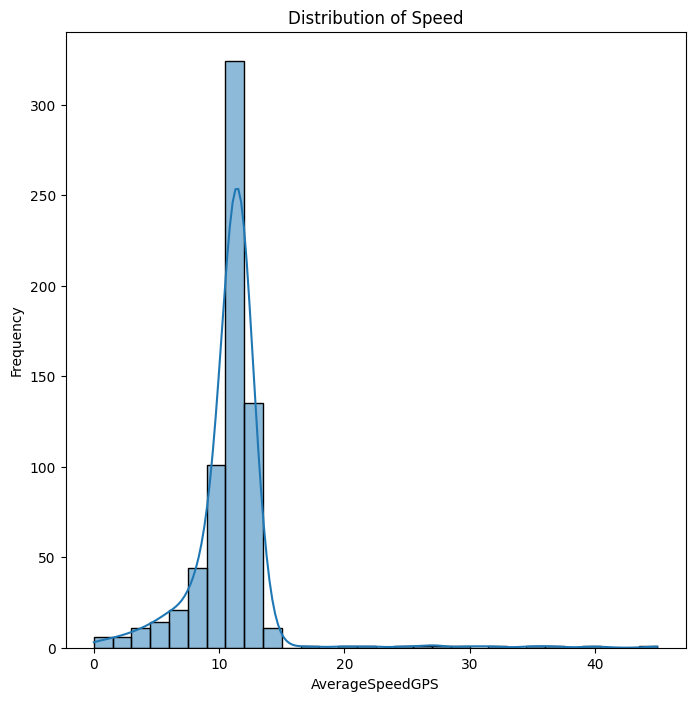

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_distribution(df, column, title):
    plt.figure(figsize=(8,8))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_distribution(main_df, 'AverageSpeedGPS', 'Distribution of Speed')



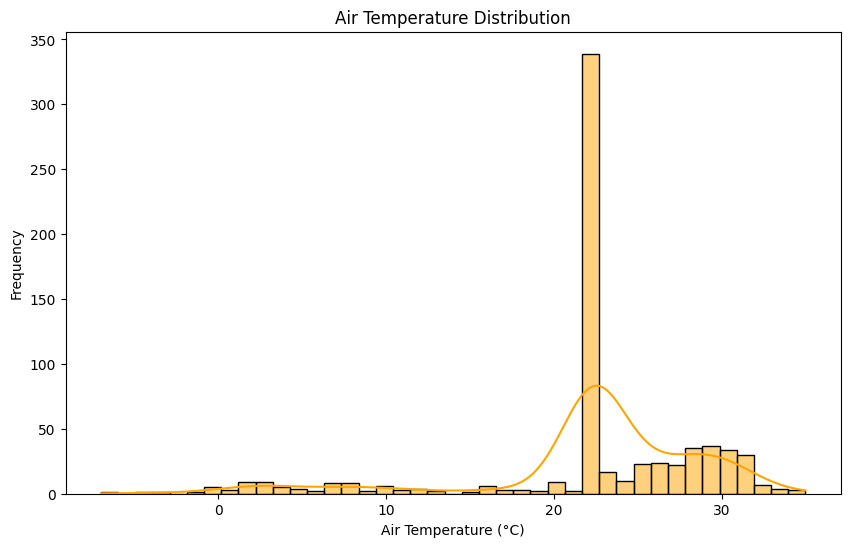

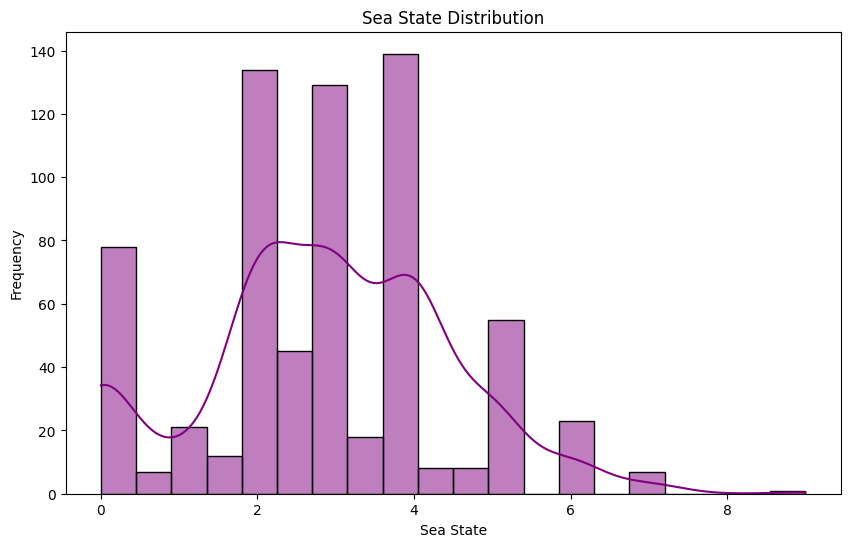

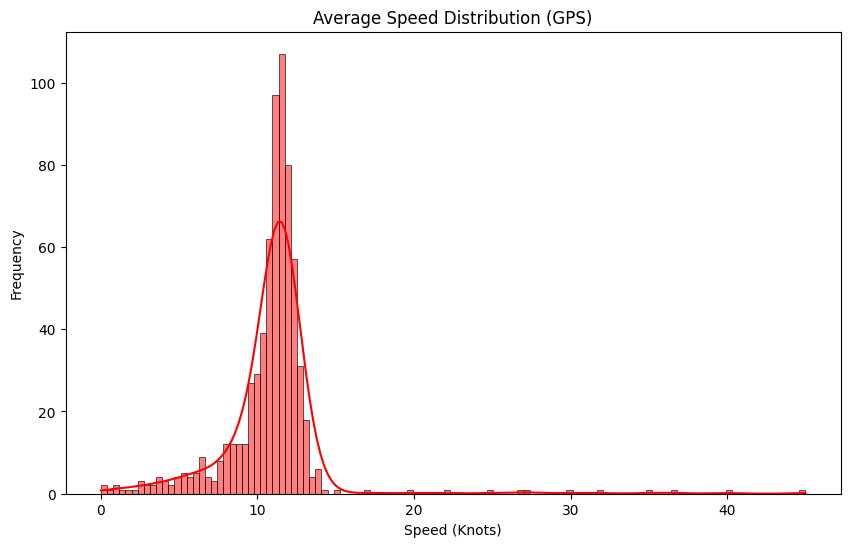

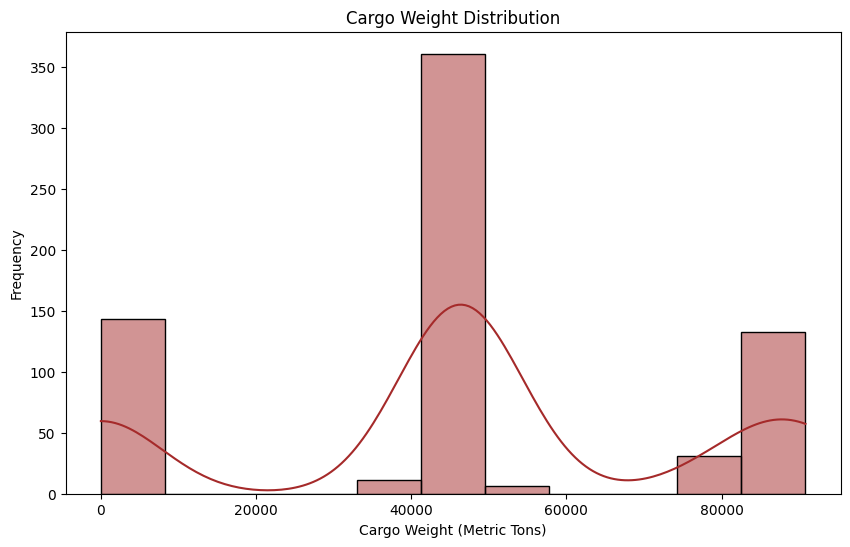

In [69]:
if "AirTemperature" in main_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_new["AirTemperature"], kde=True, color="orange")
    plt.title("Air Temperature Distribution")
    plt.xlabel("Air Temperature (°C)")
    plt.ylabel("Frequency")
    plt.show()

if "WindStrength" in main_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_new["WindStrength"], kde=True, color="green")
    plt.title("Wind Strength Distribution")
    plt.xlabel("Wind Strength (Beaufort Scale)")
    plt.ylabel("Frequency")
    plt.show()

if "SeaState" in main_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_new["SeaState"], kde=True, color="purple")
    plt.title("Sea State Distribution")
    plt.xlabel("Sea State")
    plt.ylabel("Frequency")
    plt.show()

if "AverageSpeedGPS" in main_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_new["AverageSpeedGPS"], kde=True, color="red")
    plt.title("Average Speed Distribution (GPS)")
    plt.xlabel("Speed (Knots)")
    plt.ylabel("Frequency")
    plt.show()

if "CargoMetricTons" in main_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_new["CargoMetricTons"], kde=True, color="brown")
    plt.title("Cargo Weight Distribution")
    plt.xlabel("Cargo Weight (Metric Tons)")
    plt.ylabel("Frequency")
    plt.show()



#### Correlation matrix

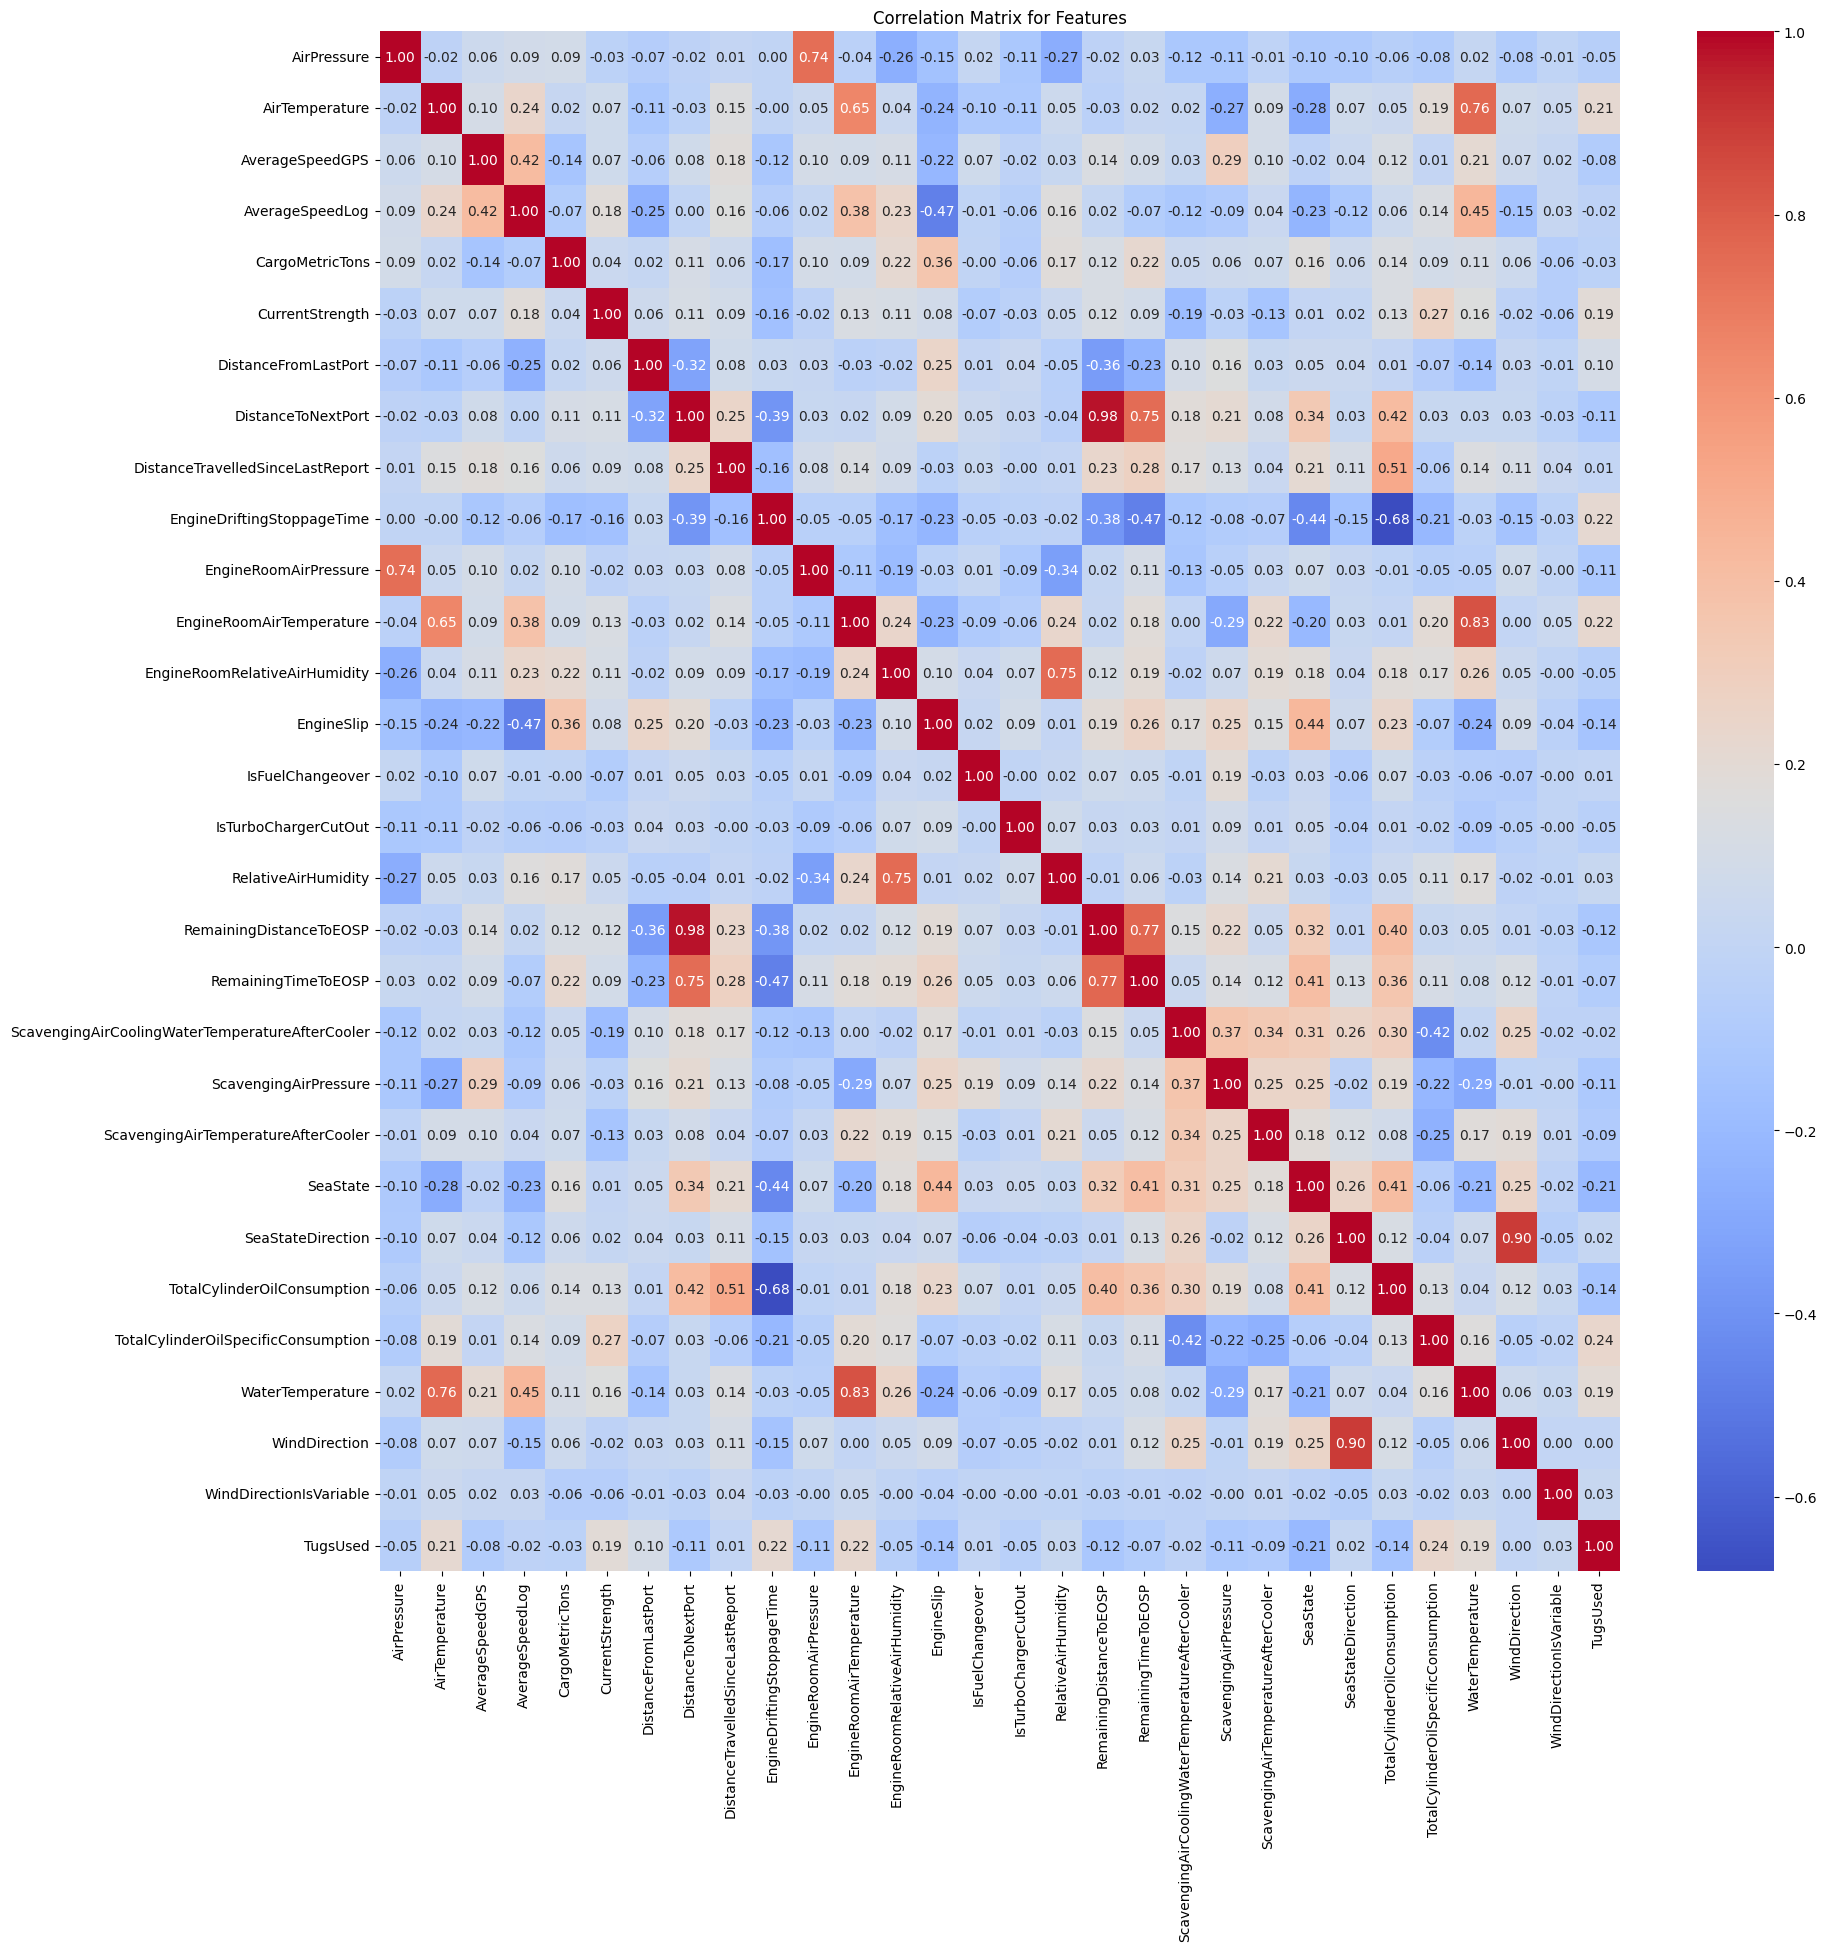

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numeric_cols = main_df.select_dtypes(include=[float, int]).iloc[:, :30].columns
plt.figure(figsize=(20, 20))
corr_matrix = main_df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Features")
plt.show()

# Phase 2: Feature Engineering 

### KPI Assumption : Total daily fuel consumption and Fuel consumed per nautical mile

#### Constructing Relevant Features

In [74]:
relevant_features_df = pd.DataFrame()
relevant_features_df['Sailed_Distance'] = df_new[[ 'DistanceFromLastPort', 'DistanceToNextPort', 'DistanceTravelledSinceLastReport', 'DistanceEospToFwe', 'DistanceToEosp']].select_dtypes(include=[float, int]).sum(axis=1)



relevant_features_df['Average_Speed'] = df_new[['AverageSpeedGPS', 'AverageSpeedLog']].mean(axis=1)

relevant_features_df['Wind_Speed_Direction'] = df_new[['WindDirection', 'WindDirectionIsVariable']].apply(lambda x: ', '.join(x.astype(str)), axis=1)
relevant_features_df['Sea_State'] = df_new[['SeaState', 'SeaStateDirection']].mean(axis=1)
relevant_features_df['Weather_Conditions'] = df_new[['AirPressure', 'AirTemperature', 'WaterTemperature', 'RelativeAirHumidity', 'Weather']].apply(lambda x: ', '.join(x.astype(str)), axis=1)

relevant_features_df['Cargo'] = df_new[['CargoMetricTons', 'EstimatedBunkersNextPort']].select_dtypes(include=[float, int]).sum(axis=1)

relevant_features_df.head()



Sailed_Distance  Average_Speed Wind_Speed_Direction  Sea_State  \
0      1973.000000      12.190000           141.0, 0.0      36.50   
1      2075.822555      12.146364            70.5, 0.0      18.25   
2      2232.770607      12.102727             0.0, 0.0       0.00   
3      2389.718659      12.059091             0.0, 0.0       0.00   
4      2546.666711      12.015455             0.0, 0.0       0.00   

                                  Weather_Conditions  Cargo  
0                   1016.0, 21.0, 26.0, 65.0, NORMAL    0.0  
1  1015.9090909090909, 21.363636363636363, 25.636...    0.0  
2  1015.8181818181819, 21.727272727272727, 25.272...    0.0  
3  1015.7272727272727, 22.09090909090909, 24.9090...    0.0  
4  1015.6363636363636, 22.454545454545453, 24.545...    0.0

In [75]:
p = list(relevant_features_df.columns)
p


['Sailed_Distance',
 'Average_Speed',
 'Wind_Speed_Direction',
 'Sea_State',
 'Weather_Conditions',
 'Cargo']

In [71]:
main_df

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0    1016.000000            21.0        11.920000        12.460000   
1    1010.523944            22.4        11.846364        12.446364   
2    1010.523944            22.4        11.772727        12.432727   
3    1010.523944            22.4        11.699091        12.419091   
4    1010.523944            22.4        11.625455        12.405455   
..           ...             ...              ...              ...   
680   996.000000             2.0         9.620000         9.620000   
681   983.000000             8.0        11.170000        11.170000   
682   999.000000            10.0        11.670000        11.670000   
683   999.000000            10.0        12.260000        12.260000   
684  1015.000000             7.0        11.790000        11.790000   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0            0.00000         1.300000           1660.000000   
1        46428.79321         1.272727           1533.272727   
2            0.00000         1.245455           1406.545455   
3            0.00000         1.218182           1279.818182   
4            0.00000         1.190909           1153.090909   
..               ...              ...                   ...   
680      46428.79321         0.500000           3087.000000   
681      46428.79321         1.000000           3344.000000   
682      46428.79321         1.000000           3624.000000   
683      46428.79321         0.800000           3906.000000   
684      46428.79321         1.000000           4189.000000   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0             27.000000                        286.000000   
1            308.818182                        219.731646   
2            590.636364                        219.731646   
3            872.454545                        219.731646   
4           1154.272727                        219.731646   
..                  ...                               ...   
680         1567.000000                        231.000000   
681         1310.000000                        257.000000   
682         1030.000000                        280.000000   
683          748.000000                        282.000000   
684          465.000000                        283.000000   

     EngineDriftingStoppageTime  ...  new_TimeZoneInfo_13:30  \
0                      0.000000  ...                     1.0   
1                     11.041667  ...                     1.0   
2                     22.083333  ...                     1.0   
3                     24.000000  ...                     1.0   
4                     24.000000  ...                     1.0   
..                          ...  ...                     ...   
680                    0.000000  ...                     0.0   
681                    0.000000  ...                     0.0   
682                    0.000000  ...                     0.0   
683                    0.000000  ...                     0.0   
684                    0.000000  ...                     0.0   

     new_TimeZoneInfo_14:30  new_TimeZoneInfo_15:30  new_TimeZoneInfo_16:30  \
0                       0.0                     0.0                     0.0   
1                       0.0                     0.0                     0.0   
2                       0.0                     0.0                     0.0   
3                       0.0                     0.0                     0.0   
4                       0.0                     0.0                     0.0   
..                      ...                     ...                     ...   
680                     0.0                     0.0                     0.0   
681                     0.0                     0.0                     0.0   
682                     0.0                     0.0                     0.0   
683                     0.0                     0.0                     0.0   
684                     0.0         

#### Combining fuel consumption array for Total Fuel Consumption Prediction

In [72]:
main_df["TotalConsumption"] = main_df["Consumption"]+main_df["TotalCylinderOilConsumption"]+main_df['TotalCylinderOilSpecificConsumption']
main_df

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0    1016.000000            21.0        11.920000        12.460000   
1    1010.523944            22.4        11.846364        12.446364   
2    1010.523944            22.4        11.772727        12.432727   
3    1010.523944            22.4        11.699091        12.419091   
4    1010.523944            22.4        11.625455        12.405455   
..           ...             ...              ...              ...   
680   996.000000             2.0         9.620000         9.620000   
681   983.000000             8.0        11.170000        11.170000   
682   999.000000            10.0        11.670000        11.670000   
683   999.000000            10.0        12.260000        12.260000   
684  1015.000000             7.0        11.790000        11.790000   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0            0.00000         1.300000           1660.000000   
1        46428.79321         1.272727           1533.272727   
2            0.00000         1.245455           1406.545455   
3            0.00000         1.218182           1279.818182   
4            0.00000         1.190909           1153.090909   
..               ...              ...                   ...   
680      46428.79321         0.500000           3087.000000   
681      46428.79321         1.000000           3344.000000   
682      46428.79321         1.000000           3624.000000   
683      46428.79321         0.800000           3906.000000   
684      46428.79321         1.000000           4189.000000   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0             27.000000                        286.000000   
1            308.818182                        219.731646   
2            590.636364                        219.731646   
3            872.454545                        219.731646   
4           1154.272727                        219.731646   
..                  ...                               ...   
680         1567.000000                        231.000000   
681         1310.000000                        257.000000   
682         1030.000000                        280.000000   
683          748.000000                        282.000000   
684          465.000000                        283.000000   

     EngineDriftingStoppageTime  ...  new_TimeZoneInfo_14:30  \
0                      0.000000  ...                     0.0   
1                     11.041667  ...                     0.0   
2                     22.083333  ...                     0.0   
3                     24.000000  ...                     0.0   
4                     24.000000  ...                     0.0   
..                          ...  ...                     ...   
680                    0.000000  ...                     0.0   
681                    0.000000  ...                     0.0   
682                    0.000000  ...                     0.0   
683                    0.000000  ...                     0.0   
684                    0.000000  ...                     0.0   

     new_TimeZoneInfo_15:30  new_TimeZoneInfo_16:30  new_TimeZoneInfo_17:30  \
0                       0.0                     0.0                     0.0   
1                       0.0                     0.0                     0.0   
2                       0.0                     0.0                     0.0   
3                       0.0                     0.0                     0.0   
4                       0.0                     0.0                     0.0   
..                      ...                     ...                     ...   
680                     0.0                     0.0                     0.0   
681                     0.0                     0.0                     0.0   
682                     0.0                     0.0                     0.0   
683                     0.0                     0.0                     0.0   
684                     0.0         

In [73]:
main_df['FuelPerNauticalMile'] = main_df['TotalConsumption'] / main_df['SailedDistance']
main_df

AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0    1016.000000            21.0        11.920000        12.460000   
1    1010.523944            22.4        11.846364        12.446364   
2    1010.523944            22.4        11.772727        12.432727   
3    1010.523944            22.4        11.699091        12.419091   
4    1010.523944            22.4        11.625455        12.405455   
..           ...             ...              ...              ...   
680   996.000000             2.0         9.620000         9.620000   
681   983.000000             8.0        11.170000        11.170000   
682   999.000000            10.0        11.670000        11.670000   
683   999.000000            10.0        12.260000        12.260000   
684  1015.000000             7.0        11.790000        11.790000   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0            0.00000         1.300000           1660.000000   
1        46428.79321         1.272727           1533.272727   
2            0.00000         1.245455           1406.545455   
3            0.00000         1.218182           1279.818182   
4            0.00000         1.190909           1153.090909   
..               ...              ...                   ...   
680      46428.79321         0.500000           3087.000000   
681      46428.79321         1.000000           3344.000000   
682      46428.79321         1.000000           3624.000000   
683      46428.79321         0.800000           3906.000000   
684      46428.79321         1.000000           4189.000000   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0             27.000000                        286.000000   
1            308.818182                        219.731646   
2            590.636364                        219.731646   
3            872.454545                        219.731646   
4           1154.272727                        219.731646   
..                  ...                               ...   
680         1567.000000                        231.000000   
681         1310.000000                        257.000000   
682         1030.000000                        280.000000   
683          748.000000                        282.000000   
684          465.000000                        283.000000   

     EngineDriftingStoppageTime  ...  new_TimeZoneInfo_15:30  \
0                      0.000000  ...                     0.0   
1                     11.041667  ...                     0.0   
2                     22.083333  ...                     0.0   
3                     24.000000  ...                     0.0   
4                     24.000000  ...                     0.0   
..                          ...  ...                     ...   
680                    0.000000  ...                     0.0   
681                    0.000000  ...                     0.0   
682                    0.000000  ...                     0.0   
683                    0.000000  ...                     0.0   
684                    0.000000  ...                     0.0   

     new_TimeZoneInfo_16:30  new_TimeZoneInfo_17:30  new_TimeZoneInfo_3:30  \
0                       0.0                     0.0                    0.0   
1                       0.0                     0.0                    0.0   
2                       0.0                     0.0                    0.0   
3                       0.0                     0.0                    0.0   
4                       0.0                     0.0                    0.0   
..                      ...                     ...                    ...   
680                     0.0                     0.0                    0.0   
681                     0.0                     0.0                    0.0   
682                     0.0                     0.0                    0.0   
683                     0.0                     0.0                    1.0   
684                     0.0                    

In [74]:
main_df1 = pd.DataFrame(main_df)
main_df1.to_csv("Final Updated dataset used for Model Building.csv", index=False)
print("\nFinal Updated data after encoding saved as Final Updated dataset used for Model Building  '.csv'")


Final Updated data after encoding saved as Final Updated dataset used for Model Building  '.csv'


# Phase 3: Model Building

### KPI-1: Total daily Fuel consumption

#### Using PCA


In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
scaling = StandardScaler()
numeric_df = main_df.select_dtypes(include=['number'])

imputer = SimpleImputer(strategy='mean')

numeric_df_imputed = imputer.fit_transform(numeric_df)

scaling.fit(numeric_df_imputed)
Scaled_data = scaling.transform(numeric_df_imputed)

principal= PCA(n_components= 35)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)
x

array([[-0.75342468, -1.04551825,  1.41929785, ..., -0.92614526,
        -0.63418984, -0.24296467],
       [-1.59894338, -0.85311298,  1.59808966, ...,  0.2525444 ,
         0.16576835,  0.70745718],
       [-3.24205383, -0.5062502 ,  1.67400685, ..., -0.49078694,
        -0.10070609,  0.60630398],
       ...,
       [ 3.46262351,  2.26487069, -0.71322595, ...,  1.82071304,
         0.18676586, -0.09781282],
       [ 2.83405342,  2.33259333, -0.79990718, ...,  0.85422086,
        -0.20634711,  0.01009354],
       [ 2.17135902,  2.89476366, -1.29981755, ...,  0.41835859,
        -0.33854902,  0.11886727]])

### Train-Test Split

In [76]:
pre_processed = pd.DataFrame(x)
pre_processed

0         1         2         3         4         5         6   \
0   -0.753425 -1.045518  1.419298 -1.643408 -1.144866 -0.644733  0.020018   
1   -1.598943 -0.853113  1.598090 -1.033634 -0.636207 -1.321790  0.866586   
2   -3.242054 -0.506250  1.674007 -0.974479 -0.630048 -0.466883  1.385188   
3   -3.243239 -0.515216  1.638924 -0.913404 -0.466432 -0.402118  1.371950   
4   -3.190480 -0.541770  1.621770 -0.858160 -0.304897 -0.364284  1.338569   
..        ...       ...       ...       ...       ...       ...       ...   
680  4.149469  4.201443 -1.624839 -2.615064  3.943692  2.135594 -2.066747   
681  3.980437  2.823678 -0.757791 -2.221280  4.486986  3.040503 -0.814611   
682  3.462624  2.264871 -0.713226 -2.157365  2.782391  2.632163  0.477856   
683  2.834053  2.332593 -0.799907 -2.272450  2.132542  2.174428  0.122029   
684  2.171359  2.894764 -1.299818 -4.006239 -1.278587  1.082997  0.307421   

           7         8         9   ...        25        26        27  \
0   -1.346321  0.427934 -0.333096  ... -0.314452 -0.688085  0.390225   
1   -0.251361  0.034605  0.017610  ... -0.267472 -1.097737  0.644536   
2    0.889944 -0.461110  0.341167  ... -0.385822 -0.847046  0.337840   
3    0.932343 -0.445704  0.408450  ... -0.379194 -0.712884  0.235071   
4    0.944977 -0.405680  0.469782  ... -0.366145 -0.591347  0.150419   
..        ...       ...       ...  ...       ...       ...       ...   
680  0.763996 -0.473116  0.075736  ...  2.883911 -0.983207 -0.191472   
681  0.525830  1.025514 -0.117984  ... -0.627720  2.569021 -0.195276   
682 -0.507413  1.246092 -0.431979  ... -0.429941  2.409450 -0.317351   
683 -0.780490  0.794851 -0.413976  ... -1.366953 -0.900850  0.150431   
684 -2.150107 -0.205536 -1.053081  ... -1.090433 -1.496103  0.345815   

           28        29        30        31        32        33        34  
0   -0.708496  0.067421  1.527092 -0.059401 -0.926145 -0.634190 -0.242965  
1   -0.979783  0.599245  1.222653 -0.592000  0.252544  0.165768  0.707457  
2   -1.377677  0.723359  1.130195 -0.377468 -0.490787 -0.100706  0.606304  
3   -1.361044  0.642763  0.978820 -0.176638 -0.731271 -0.123559  0.658937  
4   -1.276534  0.581572  0.837657  0.012125 -0.960610 -0.142639  0.678889  
..        ...       ...       ...       ...       ...       ...       ...  
680  0.606563  0.028367 -0.596592  0.543006 -0.937230 -0.791019 -1.231958  
681  0.373131  1.122574 -0.525137 -1.197104  2.512733  0.594634  0.384131  
682  0.325333  1.080042 -0.678546 -0.791884  1.820713  0.186766 -0.097813  
683  0.587575 -1.651550 -1.343807 -0.827141  0.854221 -0.206347  0.010094  
684  0.744329 -1.262505 -0.275958 -0.631800  0.418359 -0.338549  0.118867  

[685 rows x 35 columns]

In [77]:
label = main_df["TotalConsumption"]
labels = scaling.fit_transform(label.values.reshape(-1, 1))
labels

array([[ 0.8501422 ],
       [ 0.        ],
       [-1.1905952 ],
       [-1.1905952 ],
       [-1.1905952 ],
       [-1.1905952 ],
       [-1.1905952 ],
       [-1.1905952 ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.86238662],
       [ 0.86238662],
       [ 0.86238662],
       [ 0.86238662],
       [ 0.86340699],
       [-1.1905952 ],
       [ 0.86340699],
       [ 0.86340699],
       [ 0.86340699],
       [ 0.86340699],
       [ 0.45525951],
       [-0.76918293],
       [-1.1905952 ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.36103545],
       [ 0.86340699],
       [-0.15696171],
       [-1.17733041],
       [-1.1905952 ],
       [-0.56510919],
       [ 0.04711203],
       [-1.1905952 ],
       [-1.1905952 ],
       [-1.1905952 ],
       [-1.1905952 ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.97325667],
       [ 0.86340699],
       [ 0.86340699],
       [ 0.86340699],
       [ 0

In [78]:
from sklearn.model_selection import train_test_split
X = pre_processed
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Baseline Predictive Model

In [79]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [80]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "Bayesian Ridge": BayesianRidge(),
    "Stochastic Gradient Descent": SGDRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Multi-layer Perceptron": MLPRegressor(),
}


model_name = "Linear Regression"
model = models[model_name]
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [81]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

model_results = []
for model_name, model in models.items():
    # Fit the model before predicting
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    model_results.append([model_name, mse, r2])

results_df = pd.DataFrame(model_results, columns=['Model', 'Mean Squared Error', 'R-squared'])
print(results_df)

c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mnkmr\AppData\Local\Temp\ipykernel_9812\2042722658.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed whe

                          Model  Mean Squared Error  R-squared
0             Linear Regression            4.117735  -3.055855
1                         Ridge            2.393387  -1.357420
2                         Lasso            0.614936   0.394305
3                   Elastic Net            0.502393   0.505157
4                Bayesian Ridge            0.978596   0.036110
5   Stochastic Gradient Descent            0.072162   0.928922
6                 Decision Tree            0.283833   0.720432
7                 Random Forest            0.148405   0.853825
8             Gradient Boosting            0.110018   0.891636
9                      AdaBoost            0.222279   0.781061
10    Support Vector Regression            0.057549   0.943316
11          K-Nearest Neighbors            0.228495   0.774939
12       Multi-layer Perceptron            0.188647   0.814188


##### Hyperparameter Tuning & Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVR 
import pickle

param_grids = {
    "Linear Regression": {},  
    "Ridge": {'alpha': [0.1, 1.0, 10.0]},
    "Lasso": {'alpha': [0.1, 1.0, 10.0]},
    "Elastic Net": {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    "Bayesian Ridge": {},  
    "Stochastic Gradient Descent": {'alpha': [0.0001, 0.001, 0.01]},
    "Decision Tree": {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Gradient Boosting": {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    "Support Vector Regression": {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 7]},
    "Multi-layer Perceptron": {'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)], 'activation': ['relu', 'tanh']},
}

all_results = []

for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1,
    )
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    all_results.append([model_name, best_params, mse, r2])

results_df = pd.DataFrame(all_results, columns=['Model', 'Best Hyperparameters', 'Mean Squared Error', 'R-squared'])
results_df


Tuning hyperparameters for Linear Regression...
Tuning hyperparameters for Ridge...
Tuning hyperparameters for Lasso...
Tuning hyperparameters for Elastic Net...
Tuning hyperparameters for Bayesian Ridge...
Tuning hyperparameters for Stochastic Gradient Descent...
Tuning hyperparameters for Decision Tree...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuning hyperparameters for Random Forest...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Tuning hyperparameters for Gradient Boosting...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuning hyperparameters for AdaBoost...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuning hyperparameters for Support Vector Regression...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuning hyperparameters for K-Nearest Neighbors...
Tuning hyperparameters for Multi-layer Perceptron...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model  \
0             Linear Regression   
1                         Ridge   
2                         Lasso   
3                   Elastic Net   
4                Bayesian Ridge   
5   Stochastic Gradient Descent   
6                 Decision Tree   
7                 Random Forest   
8             Gradient Boosting   
9                      AdaBoost   
10    Support Vector Regression   
11          K-Nearest Neighbors   
12       Multi-layer Perceptron   

                                 Best Hyperparameters  Mean Squared Error  \
0                                                  {}            4.117735   
1                                      {'alpha': 1.0}            2.393387   
2                                      {'alpha': 0.1}            0.147445   
3                     {'alpha': 0.1, 'l1_ratio': 0.1}            0.068654   
4                                                  {}            0.978596   
5                                     {'alpha': 0.01}            0.073100   
6           {'max_depth': 10, 'min_samples_split': 2}            0.256028   
7   {'max_depth': 20, 'min_samples_split': 2, 'n_e...            0.145356   
8         {'learning_rate': 0.1, 'n_estimators': 300}            0.096928   
9         {'learning_rate': 1.0, 'n_estimators': 200}            0.199244   
10                       {'C': 10.0, 'kernel': 'rbf'}            0.046030   
11                                 {'n_neighbors': 5}            0.228495   
12  {'activation': 'tanh', 'hidden_layer_sizes': (...            0.040007   

    R-squared  
0   -3.055855  
1   -1.357420  
2    0.854771  
3    0.932378  
4    0.036110  
5    0.927999  
6    0.747819  
7    0.856828  
8    0.904528  
9    0.803751  
10   0.954662  
11   0.774939  
12   0.960595

#### Feature Importance using SHAP

  0%|          | 0/137 [00:00<?, ?it/s]

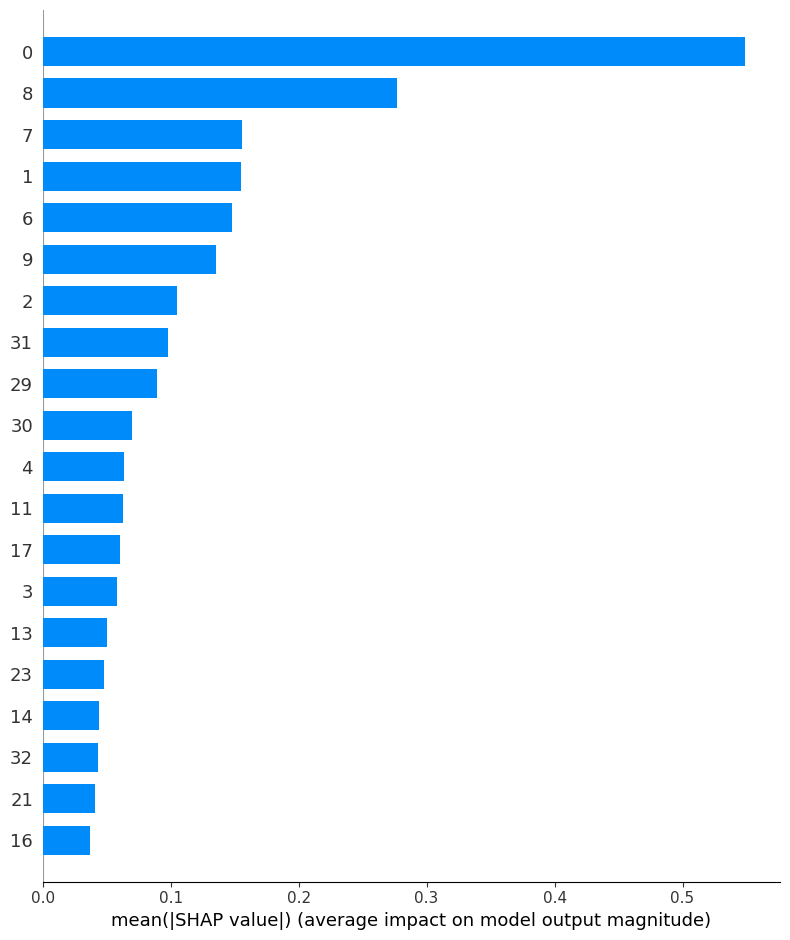

In [ ]:
import shap

explainer = shap.KernelExplainer(best_model.predict, X_train[:100]) 

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


 ##### Permutation importance

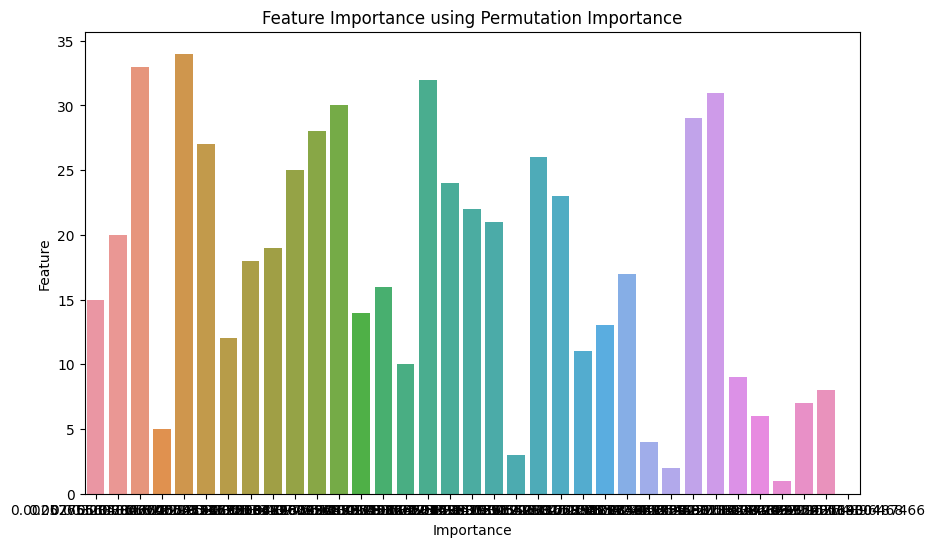

In [ ]:
from sklearn.inspection import permutation_importance


perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=0)

perm_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title("Feature Importance using Permutation Importance")
plt.show()


### Without Using PCA

In [90]:
from sklearn.model_selection import train_test_split
X = main_df.drop(['TotalConsumption'], axis=1)
y = main_df['TotalConsumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)


In [91]:
models1 = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "Bayesian Ridge": BayesianRidge(),
    "Stochastic Gradient Descent": SGDRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Multi-layer Perceptron": MLPRegressor(),
}

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


model_name = "Linear Regression"
model = models1[model_name]
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [92]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

model_results = []
for model_name, model in models1.items():
    # Fit the model before predicting
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    model_results.append([model_name, mse, r2])

results_df = pd.DataFrame(model_results, columns=['Model', 'Mean Squared Error', 'R-squared'])
print(results_df)

c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


                          Model  Mean Squared Error     R-squared
0             Linear Regression        3.823128e-24  1.000000e+00
1                         Ridge        3.687518e-04  9.999999e-01
2                         Lasso        8.190751e-03  9.999978e-01
3                   Elastic Net        1.004311e-02  9.999972e-01
4                Bayesian Ridge        1.134930e-17  1.000000e+00
5   Stochastic Gradient Descent        9.956346e+47 -2.727866e+44
6                 Decision Tree        3.376221e+01  9.907497e-01
7                 Random Forest        1.083628e+01  9.970310e-01
8             Gradient Boosting        8.506572e+00  9.976693e-01
9                      AdaBoost        4.862194e+01  9.866784e-01
10          K-Nearest Neighbors        3.792492e+03 -3.907675e-02
11       Multi-layer Perceptron        7.653099e+04 -1.996816e+01


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV 
import pickle


param_grids = {
    "Linear Regression": {},
    "Ridge": {'alpha': [0.1, 1.0, 10.0]},
    "Lasso": {'alpha': [0.1, 1.0, 10.0]},
    "Elastic Net": {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    "Bayesian Ridge": {},  
    "Stochastic Gradient Descent": {'alpha': [0.0001, 0.001, 0.01]},
    "Decision Tree": {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Gradient Boosting": {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 7]},
    "Multi-layer Perceptron": {'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)], 'activation': ['relu', 'tanh']},
}

all_results = []
for model_name, model in models1.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1,
    )
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    with open(f'{model_name}_best_model_Total_Consumption.pkl', 'wb') as file:
        pickle.dump(best_model, file)

    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    
    all_results.append([model_name, best_params, mse, r2])

results_df = pd.DataFrame(all_results, columns=['Model', 'Best Hyperparameters', 'Mean Squared Error', 'R-squared'])
results_df


Tuning hyperparameters for Linear Regression...
Tuning hyperparameters for Ridge...
Tuning hyperparameters for Lasso...
Tuning hyperparameters for Elastic Net...
Tuning hyperparameters for Bayesian Ridge...
Tuning hyperparameters for Stochastic Gradient Descent...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Tuning hyperparameters for Decision Tree...
Tuning hyperparameters for Random Forest...
Tuning hyperparameters for Gradient Boosting...
Tuning hyperparameters for AdaBoost...
Tuning hyperparameters for K-Nearest Neighbors...
Tuning hyperparameters for Multi-layer Perceptron...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model  \
0             Linear Regression   
1                         Ridge   
2                         Lasso   
3                   Elastic Net   
4                Bayesian Ridge   
5   Stochastic Gradient Descent   
6                 Decision Tree   
7                 Random Forest   
8             Gradient Boosting   
9                      AdaBoost   
10          K-Nearest Neighbors   
11       Multi-layer Perceptron   

                                 Best Hyperparameters  Mean Squared Error  \
0                                                  {}        3.823128e-24   
1                                      {'alpha': 0.1}        4.506569e-06   
2                                      {'alpha': 1.0}        8.190751e-03   
3                     {'alpha': 0.1, 'l1_ratio': 0.1}        3.248424e-02   
4                                                  {}        1.134930e-17   
5                                     {'alpha': 0.01}        3.534430e+47   
6           {'max_depth': 10, 'min_samples_split': 2}        1.746381e+02   
7   {'max_depth': None, 'min_samples_split': 2, 'n...        1.465264e+01   
8         {'learning_rate': 0.1, 'n_estimators': 300}        7.159320e+00   
9         {'learning_rate': 1.0, 'n_estimators': 200}        2.514482e+01   
10                                 {'n_neighbors': 7}        3.537749e+03   
11  {'activation': 'tanh', 'hidden_layer_sizes': (...        1.058740e+04   

       R-squared  
0   1.000000e+00  
1   1.000000e+00  
2   9.999978e-01  
3   9.999911e-01  
4   1.000000e+00  
5  -9.683723e+43  
6   9.521522e-01  
7   9.959854e-01  
8   9.980385e-01  
9   9.931108e-01  
10  3.071841e-02  
11 -1.900763e+00

In [95]:
from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

xgb_model = XGBRegressor(n_estimators=100, max_depth=8, n_jobs=2)
xgb_model.fit(X_train, y_train)

xgb_y_pred = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print('Decision Tree Model Metrics:')
print(f'RMSE: {xgb_rmse}')
print(f'MAE: {xgb_mae}')
print(f'MAPE: {xgb_mape}')
print(f'R2: {xgb_r2}')

Decision Tree Model Metrics:
RMSE: 4.664405470963386
MAE: 1.9604684057859338
MAPE: 0.009455313826947618
R2: 0.9940390486052902


### KPI-2 : Fuel consumed per nautical mile

### Using PCA


### Train-Test Split

In [96]:
label = main_df['FuelPerNauticalMile']
labels = scaling.fit_transform(label.values.reshape(-1, 1))
labels

array([[ 1.18977071e-01],
       [-1.22221901e-01],
       [-4.60012848e-01],
       [-4.60012848e-01],
       [-4.60012848e-01],
       [-4.60012848e-01],
       [-4.60012848e-01],
       [-4.60012848e-01],
       [-1.22221901e-01],
       [-1.22221901e-01],
       [ 2.08294835e+00],
       [ 1.22451011e-01],
       [ 1.22451011e-01],
       [ 1.22451011e-01],
       [ 1.22451011e-01],
       [ 1.22740506e-01],
       [-4.60012848e-01],
       [ 1.22740506e-01],
       [ 1.22740506e-01],
       [ 1.22740506e-01],
       [ 1.22740506e-01],
       [ 6.94252209e-03],
       [-3.40451430e-01],
       [-4.60012848e-01],
       [-1.22221901e-01],
       [-1.22221901e-01],
       [-2.29474655e-02],
       [-2.24653446e-01],
       [ 1.22740506e-01],
       [-1.66754454e-01],
       [-4.56249413e-01],
       [-4.60012848e-01],
       [-2.82552438e-01],
       [-1.08855462e-01],
       [-4.60012848e-01],
       [-4.60012848e-01],
       [-4.60012848e-01],
       [-4.60012848e-01],
       [-1.2

In [97]:
from sklearn.model_selection import train_test_split
X = pre_processed
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Baseline Predictive Model

In [98]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "Bayesian Ridge": BayesianRidge(),
    "Stochastic Gradient Descent": SGDRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Multi-layer Perceptron": MLPRegressor(),
}


model_name = "Linear Regression"
model = models[model_name]
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

model_results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    model_results.append([model_name, mse, r2])

results_df = pd.DataFrame(model_results, columns=['Model', 'Mean Squared Error', 'R-squared'])
print(results_df)

c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mnkmr\AppData\Local\Temp\ipykernel_9812\2042722658.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed whe

                          Model  Mean Squared Error  R-squared
0             Linear Regression           47.397351 -56.139129
1                         Ridge           17.521250 -20.122466
2                         Lasso            0.829839  -0.000400
3                   Elastic Net            0.745335   0.101473
4                Bayesian Ridge           10.970793 -12.225667
5   Stochastic Gradient Descent            0.268116   0.676777
6                 Decision Tree            0.628180   0.242707
7                 Random Forest            0.370384   0.553490
8             Gradient Boosting            0.430714   0.480759
9                      AdaBoost            0.244910   0.704752
10    Support Vector Regression            0.324484   0.608823
11          K-Nearest Neighbors            0.354376   0.572788
12       Multi-layer Perceptron            0.339150   0.591143


##### Hyperparameter Tuning & Validation

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV 
import pickle


param_grids = {
    "Linear Regression": {},  
    "Ridge": {'alpha': [0.1, 1.0, 10.0]},
    "Lasso": {'alpha': [0.1, 1.0, 10.0]},
    "Elastic Net": {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    "Bayesian Ridge": {}, 
    "Stochastic Gradient Descent": {'alpha': [0.0001, 0.001, 0.01]},
    "Decision Tree": {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Gradient Boosting": {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    "Support Vector Regression": {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 7]},
    "Multi-layer Perceptron": {'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)], 'activation': ['relu', 'tanh']},
}

all_results = []

for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1,
    )
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

   
    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    all_results.append([model_name, best_params, mse, r2])

results_df = pd.DataFrame(all_results, columns=['Model', 'Best Hyperparameters', 'Mean Squared Error', 'R-squared'])
results_df


Tuning hyperparameters for Linear Regression...
Tuning hyperparameters for Ridge...
Tuning hyperparameters for Lasso...
Tuning hyperparameters for Elastic Net...
Tuning hyperparameters for Bayesian Ridge...
Tuning hyperparameters for Stochastic Gradient Descent...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuning hyperparameters for Decision Tree...
Tuning hyperparameters for Random Forest...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Tuning hyperparameters for Gradient Boosting...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuning hyperparameters for AdaBoost...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuning hyperparameters for Support Vector Regression...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Tuning hyperparameters for K-Nearest Neighbors...
Tuning hyperparameters for Multi-layer Perceptron...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model  \
0             Linear Regression   
1                         Ridge   
2                         Lasso   
3                   Elastic Net   
4                Bayesian Ridge   
5   Stochastic Gradient Descent   
6                 Decision Tree   
7                 Random Forest   
8             Gradient Boosting   
9                      AdaBoost   
10    Support Vector Regression   
11          K-Nearest Neighbors   
12       Multi-layer Perceptron   

                                 Best Hyperparameters  Mean Squared Error  \
0                                                  {}           47.397351   
1                                     {'alpha': 10.0}            1.173375   
2                                      {'alpha': 0.1}            0.267754   
3                     {'alpha': 0.1, 'l1_ratio': 0.1}            0.162733   
4                                                  {}           10.970793   
5                                   {'alpha': 0.0001}            0.240551   
6           {'max_depth': 20, 'min_samples_split': 5}            1.286669   
7   {'max_depth': 20, 'min_samples_split': 2, 'n_e...            0.383221   
8         {'learning_rate': 1.0, 'n_estimators': 200}            2.048530   
9         {'learning_rate': 1.0, 'n_estimators': 200}            0.206127   
10                       {'C': 10.0, 'kernel': 'rbf'}            0.073093   
11                                 {'n_neighbors': 3}            0.385582   
12  {'activation': 'relu', 'hidden_layer_sizes': (...            0.058931   

    R-squared  
0  -56.139129  
1   -0.414543  
2    0.677213  
3    0.803819  
4  -12.225667  
5    0.710007  
6   -0.551124  
7    0.538015  
8   -1.469573  
9    0.751507  
10   0.911884  
11   0.535168  
12   0.928957

#### Feature Importance using SHAP

  0%|          | 0/137 [00:00<?, ?it/s]

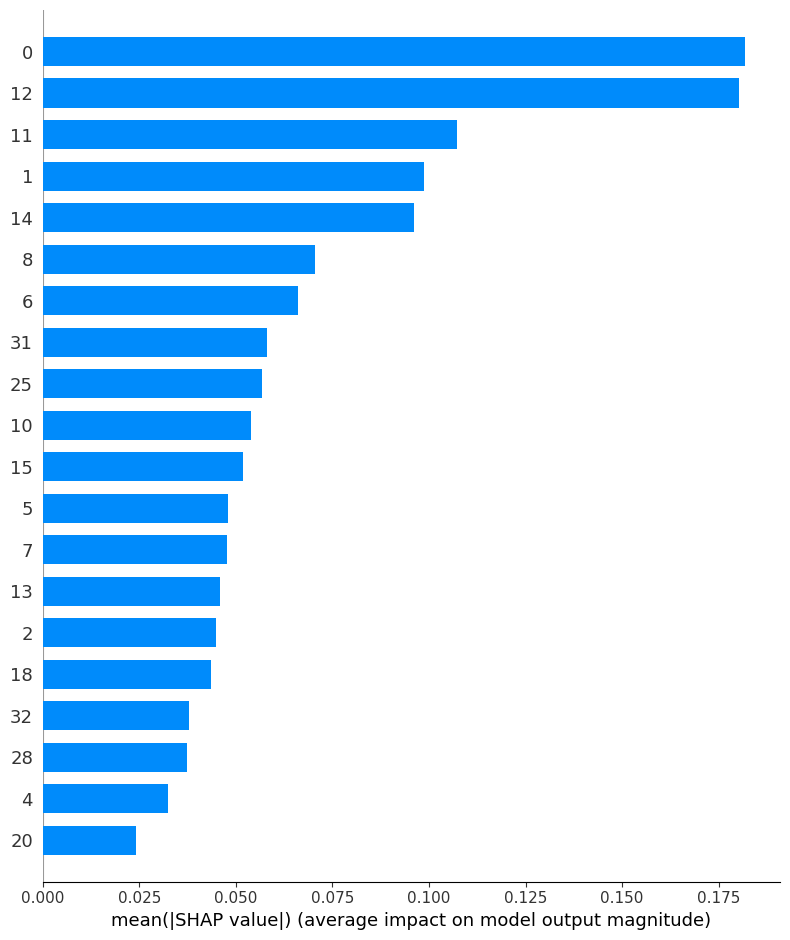

In [101]:
import shap

explainer = shap.KernelExplainer(best_model.predict, X_train[:100])  # Using a sample for KernelExplainer

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


 ##### Permutation importance

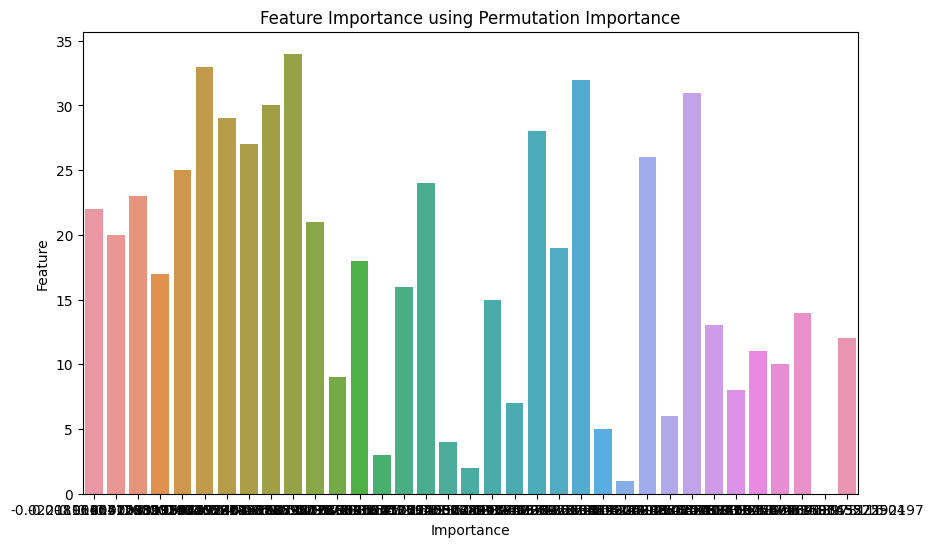

In [102]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=0)

perm_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title("Feature Importance using Permutation Importance")
plt.show()


# Without Using PCA


In [127]:
from sklearn.model_selection import train_test_split
X = main_df.drop(['FuelPerNauticalMile'], axis=1)
y = main_df['FuelPerNauticalMile']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)


In [128]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [129]:
models2 = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic Net": ElasticNet(),
    "Bayesian Ridge": BayesianRidge(),
    "Stochastic Gradient Descent": SGDRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Multi-layer Perceptron": MLPRegressor(),
}

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


model_name_new = "Linear Regression"
model = models2[model_name_new]
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [130]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

model_results_final = []
for model_name_new, model in models2.items():
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    model_results_final.append([model_name_new, mse, r2])

results_df = pd.DataFrame(model_results_final, columns=['Model', 'Mean Squared Error', 'R-squared'])
print(results_df)

c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.31193e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


                          Model  Mean Squared Error     R-squared
0             Linear Regression        1.872343e+01 -8.344811e-02
1                         Ridge        3.030675e+01 -7.537277e-01
2                         Lasso        1.123906e+01  3.496418e-01
3                   Elastic Net        1.350643e+01  2.184380e-01
4                Bayesian Ridge        1.606111e+01  7.060940e-02
5   Stochastic Gradient Descent        1.791328e+89 -1.036568e+88
6                 Decision Tree        3.326417e+00  8.075139e-01
7                 Random Forest        1.821975e+00  8.945697e-01
8             Gradient Boosting        2.201871e+00  8.725867e-01
9                      AdaBoost        3.573845e+00  7.931962e-01
10          K-Nearest Neighbors        2.988561e+01 -7.293579e-01
11       Multi-layer Perceptron        5.879942e+20 -3.402482e+19


In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV 
import pickle


param_grids = {
    "Linear Regression": {}, 
    "Ridge": {'alpha': [0.1, 1.0, 10.0]},
    "Lasso": {'alpha': [0.1, 1.0, 10.0]},
    "Elastic Net": {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    "Bayesian Ridge": {}, 
    "Stochastic Gradient Descent": {'alpha': [0.0001, 0.001, 0.01]},
    "Decision Tree": {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Gradient Boosting": {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 7]},
    "Multi-layer Perceptron": {'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)], 'activation': ['relu', 'tanh']},
}


all_results_final = []

for model_name_new, model in models2.items():
    print(f"Tuning hyperparameters for {model_name_new}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name_new],
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1,
    )
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    with open(f'{model_name_new}_nautical_mile.pkl', 'wb') as file:
        pickle.dump(best_model, file)

    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    all_results_final.append([model_name_new, best_params, mse, r2])

results_df = pd.DataFrame(all_results_final, columns=['Model', 'Best Hyperparameters', 'Mean Squared Error', 'R-squared'])
results_df


Tuning hyperparameters for Linear Regression...
Tuning hyperparameters for Ridge...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.16135e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Tuning hyperparameters for Lasso...
Tuning hyperparameters for Elastic Net...


c:\Users\mnkmr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.511e+04, tolerance: 3.369e+00
  model = cd_fast.enet_coordinate_descent(


Tuning hyperparameters for Bayesian Ridge...
Tuning hyperparameters for Stochastic Gradient Descent...
Tuning hyperparameters for Decision Tree...
Tuning hyperparameters for Random Forest...
Tuning hyperparameters for Gradient Boosting...
Tuning hyperparameters for AdaBoost...
Tuning hyperparameters for K-Nearest Neighbors...
Tuning hyperparameters for Multi-layer Perceptron...


Model  \
0             Linear Regression   
1                         Ridge   
2                         Lasso   
3                   Elastic Net   
4                Bayesian Ridge   
5   Stochastic Gradient Descent   
6                 Decision Tree   
7                 Random Forest   
8             Gradient Boosting   
9                      AdaBoost   
10          K-Nearest Neighbors   
11       Multi-layer Perceptron   

                                 Best Hyperparameters  Mean Squared Error  \
0                                                  {}        1.872343e+01   
1                                     {'alpha': 10.0}        2.828521e+01   
2                                     {'alpha': 10.0}        9.467090e+00   
3                    {'alpha': 10.0, 'l1_ratio': 0.9}        9.464865e+00   
4                                                  {}        1.606111e+01   
5                                     {'alpha': 0.01}        1.533981e+87   
6          {'max_depth': 10, 'min_samples_split': 10}        1.387164e+00   
7   {'max_depth': 20, 'min_samples_split': 2, 'n_e...        2.469383e+00   
8        {'learning_rate': 0.01, 'n_estimators': 300}        8.531241e-01   
9        {'learning_rate': 0.01, 'n_estimators': 200}        3.081474e+00   
10                                 {'n_neighbors': 5}        2.988561e+01   
11  {'activation': 'tanh', 'hidden_layer_sizes': (...        1.728530e+01   

       R-squared  
0  -8.344811e-02  
1  -6.367493e-01  
2   4.521782e-01  
3   4.523070e-01  
4   7.060940e-02  
5  -8.876520e+85  
6   9.197305e-01  
7   8.571069e-01  
8   9.506332e-01  
9   8.216877e-01  
10 -7.293579e-01  
11 -2.294930e-04

In [109]:
from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

xgb_model = XGBRegressor(n_estimators=100, max_depth=8, n_jobs=2)
xgb_model.fit(X_train, y_train)

xgb_y_pred = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print('Decision Tree Model Metrics:')
print(f'RMSE: {xgb_rmse}')
print(f'MAE: {xgb_mae}')
print(f'MAPE: {xgb_mape}')
print(f'R2: {xgb_r2}')

Decision Tree Model Metrics:
RMSE: 4.664405470963386
MAE: 1.9604684057859338
MAPE: 0.009455313826947618
R2: 0.9940390486052902


In [110]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    json.dump(columns, f)

print("Column names saved as 'columns.json'")


Column names saved as 'columns.json'


## Phase 4: Anomaly Detection 

#### Outlier Detection Using Isolation Forest

In [112]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest

X = main_df.drop(['FuelPerNauticalMile'], axis=1)
X = X.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X)

main_df['IsoForest_Anomaly'] = iso_forest.predict(X)
main_df['IsoForest_Anomaly'] = main_df['IsoForest_Anomaly'].apply(lambda x: 1 if x == -1 else 0)

print("\nResults with Isolation Forest Anomalies:")
main_df



Results with Isolation Forest Anomalies:


AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
0    1016.000000            21.0        11.920000        12.460000   
1    1010.523944            22.4        11.846364        12.446364   
2    1010.523944            22.4        11.772727        12.432727   
3    1010.523944            22.4        11.699091        12.419091   
4    1010.523944            22.4        11.625455        12.405455   
..           ...             ...              ...              ...   
680   996.000000             2.0         9.620000         9.620000   
681   983.000000             8.0        11.170000        11.170000   
682   999.000000            10.0        11.670000        11.670000   
683   999.000000            10.0        12.260000        12.260000   
684  1015.000000             7.0        11.790000        11.790000   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
0            0.00000         1.300000           1660.000000   
1        46428.79321         1.272727           1533.272727   
2            0.00000         1.245455           1406.545455   
3            0.00000         1.218182           1279.818182   
4            0.00000         1.190909           1153.090909   
..               ...              ...                   ...   
680      46428.79321         0.500000           3087.000000   
681      46428.79321         1.000000           3344.000000   
682      46428.79321         1.000000           3624.000000   
683      46428.79321         0.800000           3906.000000   
684      46428.79321         1.000000           4189.000000   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
0             27.000000                        286.000000   
1            308.818182                        219.731646   
2            590.636364                        219.731646   
3            872.454545                        219.731646   
4           1154.272727                        219.731646   
..                  ...                               ...   
680         1567.000000                        231.000000   
681         1310.000000                        257.000000   
682         1030.000000                        280.000000   
683          748.000000                        282.000000   
684          465.000000                        283.000000   

     EngineDriftingStoppageTime  ...  new_TimeZoneInfo_16:30  \
0                      0.000000  ...                     0.0   
1                     11.041667  ...                     0.0   
2                     22.083333  ...                     0.0   
3                     24.000000  ...                     0.0   
4                     24.000000  ...                     0.0   
..                          ...  ...                     ...   
680                    0.000000  ...                     0.0   
681                    0.000000  ...                     0.0   
682                    0.000000  ...                     0.0   
683                    0.000000  ...                     0.0   
684                    0.000000  ...                     0.0   

     new_TimeZoneInfo_17:30  new_TimeZoneInfo_3:30  new_TimeZoneInfo_4:30  \
0                       0.0                    0.0                    0.0   
1                       0.0                    0.0                    0.0   
2                       0.0                    0.0                    0.0   
3                       0.0                    0.0                    0.0   
4                       0.0                    0.0                    0.0   
..                      ...                    ...                    ...   
680                     0.0                    0.0                    0.0   
681                     0.0                    0.0                    1.0   
682                     0.0                    0.0                    1.0   
683                     0.0                    1.0                    0.0   
684                     0.0                    1.0        

##### Anomalous Point Detection with Isolation Forest

In [113]:
anomalous_points = main_df[main_df['IsoForest_Anomaly'] == 1]

print("\nTable of Anomalous Points:")
anomalous_points



Table of Anomalous Points:


AirPressure  AirTemperature  AverageSpeedGPS  AverageSpeedLog  \
32   1010.523944            22.4             7.72            13.86   
41   1000.000000            30.0            12.50            15.00   
42   1000.000000            27.0             9.87            10.43   
43   1005.000000            29.0            13.78            14.48   
85   1009.000000            29.0             9.68            14.52   
..           ...             ...              ...              ...   
678   987.000000             3.0             7.38             7.38   
679   969.000000             4.0             3.83             3.83   
680   996.000000             2.0             9.62             9.62   
681   983.000000             8.0            11.17            11.17   
684  1015.000000             7.0            11.79            11.79   

     CargoMetricTons  CurrentStrength  DistanceFromLastPort  \
32       40000.00000              1.0                 627.0   
41           0.00000              1.0                 248.0   
42           0.00000              0.8                 475.0   
43           0.00000              2.0                 792.0   
85           0.00000              2.6                  32.0   
..               ...              ...                   ...   
678      46428.79321              1.0                2768.0   
679      46428.79321              1.0                2856.0   
680      46428.79321              0.5                3087.0   
681      46428.79321              1.0                3344.0   
684      46428.79321              1.0                4189.0   

     DistanceToNextPort  DistanceTravelledSinceLastReport  \
32                 97.0                              44.0   
41               1369.0                              60.0   
42               1142.0                             227.0   
43                825.0                             317.0   
85               3356.0                              30.0   
..                  ...                               ...   
678              1880.0                             177.0   
679              1798.0                              88.0   
680              1567.0                             231.0   
681              1310.0                             257.0   
684               465.0                             283.0   

     EngineDriftingStoppageTime  ...  new_TimeZoneInfo_16:30  \
32                    18.333333  ...                     0.0   
41                     0.000000  ...                     0.0   
42                     0.000000  ...                     0.0   
43                     0.000000  ...                     0.0   
85                     0.000000  ...                     0.0   
..                          ...  ...                     ...   
678                    0.000000  ...                     0.0   
679                    0.000000  ...                     0.0   
680                    0.000000  ...                     0.0   
681                    0.000000  ...                     0.0   
684                    0.000000  ...                     0.0   

     new_TimeZoneInfo_17:30  new_TimeZoneInfo_3:30  new_TimeZoneInfo_4:30  \
32                      0.0                    0.0                    0.0   
41                      0.0                    0.0                    0.0   
42                      0.0                    0.0                    0.0   
43                      0.0                    0.0                    0.0   
85                      0.0                    0.0                    0.0   
..                      ...                    ...                    ...   
678                     0.0                    0.0                    0.0   
679                     0.0                    0.0                    0.0   
680                     0.0                    0.0                    0.0   
681                     0.0                    0.0                    1.0   
684                     0.0                    1.0        

#### Visualization and Validation

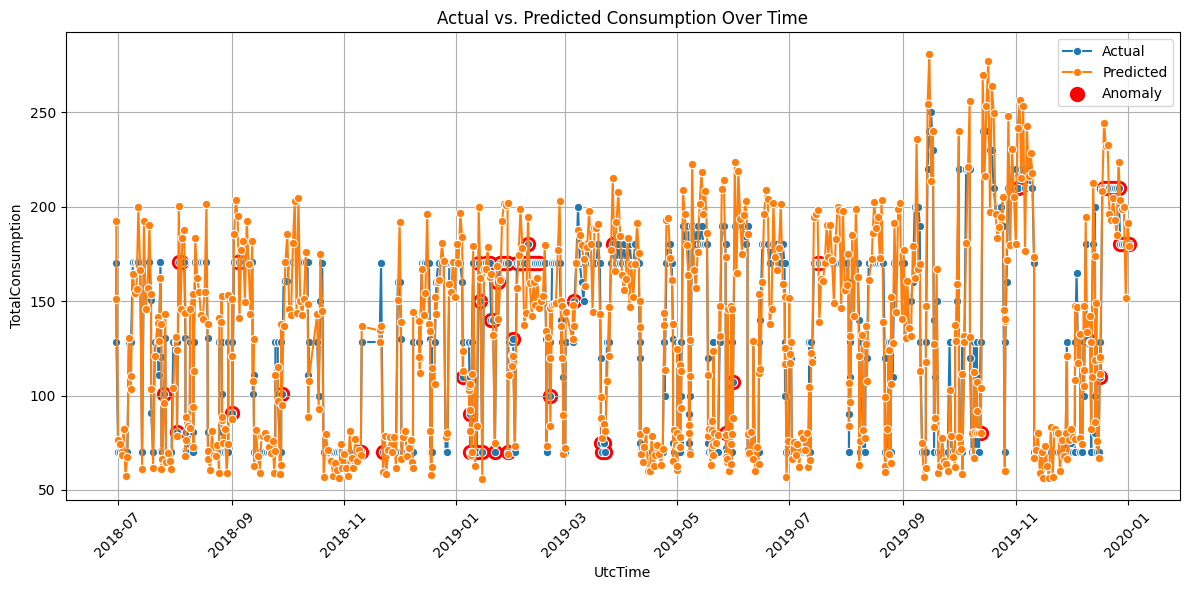

In [ ]:
main_df['UtcTime'] = pd.to_datetime(main_df['UtcTime'])

if 'Predicted' not in main_df.columns:
    main_df['Predicted'] = main_df['TotalConsumption'] * np.random.uniform(0.8, 1.2, size=len(main_df))

plt.figure(figsize=(12, 6))
sns.lineplot(x='UtcTime', y='TotalConsumption', data=main_df, label='Actual', marker='o')
sns.lineplot(x='UtcTime', y='Predicted', data=main_df, label='Predicted', marker='o')


anomalies = main_df[main_df['anomalous_points'] == 1]
plt.scatter(anomalies['UtcTime'], anomalies['TotalConsumption'], color='red', label='Anomaly', s=100)

plt.title('Actual vs. Predicted Consumption Over Time')
plt.xlabel('UtcTime')
plt.ylabel('TotalConsumption')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [121]:
df_out = main_df.replace([float('inf'), -float('inf')], float('nan'))
 
df_out = df_out.select_dtypes(include=['number'])

df_out = df_out.loc[:, (df_out != 0).any(axis=0)]
 
cols_to_drop = df_out.filter(regex='^(new_TimeZoneInfo|Energy|RunningHours|WindDirectionIsVariable|IsoForest_Anamoly|Consumption|Is|SailedDistance)').columns 
df_out = df_out.drop(cols_to_drop, axis=1)

n_columns = len(df_out.columns)
fig, ax = plt.subplots(nrows=n_columns, ncols=2, figsize=(30, 6 * n_columns))

for i, column in enumerate(df_out.columns):
    # Histogram
    sns.histplot(data=df_out, x=column, kde=True, ax=ax[i, 0])
    ax[i, 0].set_title(f'Histogram of {column}')
    
    # Boxplot
    sns.boxplot(data=df_out, x=column, ax=ax[i, 1])
    ax[i, 1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()